# Optimizing XGBoost parameters with all features of the prepared files

In [1]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklift.models import ClassTransformation
from sklift import metrics
from sklift.viz import plot_qini_curve
import chime

/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
%load_ext chime

In [3]:
clients = pd.read_csv('clients_train_modified_2.csv', index_col='client_id')
clients

,regular_points_received_mean,regular_points_received_sum,express_points_received_mean,express_points_received_sum,regular_points_spent_mean,regular_points_spent_sum,express_points_spent_mean,express_points_spent_sum,purchase_mean,purchase_sum,...,last_month_spend,relative_spend_last_month,regular_points_received_last_month,express_points_received_last_month,regular_points_spent_last_month,express_points_spent_last_month,nunique,bought_most_pop,days_since_last_transact,purchased_own_products
client_id,,,,,,,,,,,,,,,,,,,,,
000012768d,6.425000,25.7,0.000,0.0,0.000000,0.0,0.000000,0.0,700.750000,2803.00,...,1222.00,1.554929,5.000000,0.0,0.0,0.0,4,0.0,4,1.0
000036f903,1.715625,54.9,1.875,60.0,0.000000,0.0,0.000000,0.0,306.406250,9805.00,...,2968.00,1.109910,1.622222,0.0,0.0,0.0,32,0.0,1,1.0
0001f552b0,5.260000,78.9,0.000,0.0,0.000000,0.0,0.000000,0.0,410.345333,6155.18,...,2211.37,1.365225,6.714286,0.0,0.0,0.0,15,1.0,2,1.0
00020e7b18,15.894444,286.1,0.000,0.0,-32.888889,-592.0,-1.666667,-30.0,1434.422778,25819.61,...,6096.27,0.905089,11.680000,0.0,-15.2,-2.0,18,1.0,3,1.0
000220a0a7,6.940000,104.1,0.000,0.0,0.000000,0.0,0.000000,0.0,573.771333,8606.57,...,3425.43,1.286872,3.262500,0.0,0.0,0.0,15,1.0,6,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffd5cd0c6,1.950000,35.1,0.000,0.0,0.000000,0.0,0.000000,0.0,318.423889,5731.63,...,2581.55,1.636468,1.587500,0.0,0.0,0.0,18,1.0,0,1.0
fffd63dfe3,1.625000,6.5,0.000,0.0,0.000000,0.0,0.000000,0.0,335.127500,1340.51,...,330.00,0.484144,1.600000,0.0,0.0,0.0,4,1.0,5,1.0
fffd8c9d7d,2.200000,11.0,0.000,0.0,0.000000,0.0,0.000000,0.0,327.306000,1636.53,...,940.00,2.029497,1.533333,0.0,0.0,0.0,5,1.0,10,1.0


In [4]:
x_cols = clients.columns

In [5]:
df_full = pd.read_csv('train.csv', index_col='client_id')\
    .join(clients, how='left')
df_full

,treatment_flg,purchased,regular_points_received_mean,regular_points_received_sum,express_points_received_mean,express_points_received_sum,regular_points_spent_mean,regular_points_spent_sum,express_points_spent_mean,express_points_spent_sum,...,last_month_spend,relative_spend_last_month,regular_points_received_last_month,express_points_received_last_month,regular_points_spent_last_month,express_points_spent_last_month,nunique,bought_most_pop,days_since_last_transact,purchased_own_products
client_id,,,,,,,,,,,,,,,,,,,,,
ad6561e2d8,1,1,2.432500,97.3,0.000000,0.0,-1.600000,-64.0,0.000000,0.0,...,2721.15,0.965714,1.966667,0.0,0.0,0.0,40,1.0,2,1.0
7c1ccbf93f,1,1,4.700000,9.4,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,851.00,0.900000,4.700000,0.0,0.0,0.0,2,1.0,13,1.0
b58fadcab6,1,1,2.772727,91.5,0.000000,0.0,-9.363636,-309.0,0.000000,0.0,...,2695.44,0.735432,3.050000,0.0,0.0,0.0,33,1.0,2,1.0
e99e6fabb9,0,0,1.046154,13.6,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,927.00,1.140460,1.100000,0.0,0.0,0.0,13,0.0,3,1.0
27fb6f8520,1,1,2.740000,82.2,0.666667,20.0,-0.133333,-4.0,-1.666667,-50.0,...,4200.60,1.487132,4.137500,0.0,0.0,0.0,30,1.0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999d284453,1,1,8.625000,34.5,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,471.00,0.611551,2.300000,0.0,0.0,0.0,4,0.0,3,1.0
f634deea4e,0,1,1.086792,57.6,0.000000,0.0,-1.754717,-93.0,0.000000,0.0,...,3535.78,1.296013,1.088889,0.0,0.0,0.0,53,1.0,0,1.0
16cb4f99b0,0,1,3.485714,24.4,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,600.00,0.700637,1.450000,0.0,0.0,0.0,7,0.0,3,1.0


In [6]:
indices_train, indices_val = train_test_split(df_full.index, 
                                              test_size=0.2, 
                                              random_state=8)

In [7]:
indices_train.shape

(112021,)

In [8]:
indices_val.shape

(28006,)

In [9]:
X_train = df_full.loc[indices_train, x_cols]
X_train

,regular_points_received_mean,regular_points_received_sum,express_points_received_mean,express_points_received_sum,regular_points_spent_mean,regular_points_spent_sum,express_points_spent_mean,express_points_spent_sum,purchase_mean,purchase_sum,...,last_month_spend,relative_spend_last_month,regular_points_received_last_month,express_points_received_last_month,regular_points_spent_last_month,express_points_spent_last_month,nunique,bought_most_pop,days_since_last_transact,purchased_own_products
client_id,,,,,,,,,,,,,,,,,,,,,
fd1ab717e8,3.008333,108.3,0.0,0.0,0.000000,0.0,0.0,0.0,242.555556,8732.00,...,2135.00,0.945412,1.020000,0.0,0.000000,0.0,36,0.0,4,1.0
5be3f83065,9.935714,139.1,0.0,0.0,0.000000,0.0,0.0,0.0,716.005000,10024.07,...,4828.00,0.883008,10.050000,0.0,0.000000,0.0,14,1.0,0,1.0
1c48fc99b2,2.130909,117.2,0.0,0.0,-2.200000,-121.0,0.0,0.0,332.561455,18290.88,...,4755.23,0.987917,1.210526,0.0,-2.000000,0.0,55,1.0,2,1.0
fcce9d3197,2.244186,96.5,0.0,0.0,-3.674419,-158.0,0.0,0.0,337.497674,14512.40,...,3275.55,0.812545,1.781818,0.0,0.000000,0.0,43,1.0,4,1.0
4f43f48cb7,9.603448,278.5,0.0,0.0,-15.482759,-449.0,0.0,0.0,843.710000,24467.59,...,7937.32,1.189472,9.350000,0.0,-15.875000,0.0,29,1.0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
c5792264c8,3.957143,83.1,0.0,0.0,0.000000,0.0,0.0,0.0,493.714286,10368.00,...,2904.00,1.064352,6.300000,0.0,0.000000,0.0,21,1.0,16,1.0
84880145bd,5.951724,172.6,0.0,0.0,-5.448276,-158.0,0.0,0.0,475.486897,13789.12,...,7061.69,1.331513,3.960000,0.0,-3.133333,0.0,29,1.0,0,1.0
49eb365a88,3.845000,76.9,0.0,0.0,-8.250000,-165.0,0.0,0.0,416.533000,8330.66,...,2279.08,1.039594,6.133333,0.0,-19.000000,0.0,20,0.0,0,1.0


In [10]:
treat_train = df_full.loc[indices_train, 'treatment_flg']
treat_train

client_id
fd1ab717e8    1
5be3f83065    1
1c48fc99b2    0
fcce9d3197    1
4f43f48cb7    0
             ..
c5792264c8    0
84880145bd    0
49eb365a88    0
1b55a9f080    1
9961481e46    1
Name: treatment_flg, Length: 112021, dtype: int64

In [11]:
y_train = df_full.loc[indices_train, 'purchased']
y_train

client_id
fd1ab717e8    1
5be3f83065    0
1c48fc99b2    1
fcce9d3197    1
4f43f48cb7    1
             ..
c5792264c8    1
84880145bd    1
49eb365a88    0
1b55a9f080    0
9961481e46    1
Name: purchased, Length: 112021, dtype: int64

In [12]:
X_val = df_full.loc[indices_val, x_cols]
X_val

,regular_points_received_mean,regular_points_received_sum,express_points_received_mean,express_points_received_sum,regular_points_spent_mean,regular_points_spent_sum,express_points_spent_mean,express_points_spent_sum,purchase_mean,purchase_sum,...,last_month_spend,relative_spend_last_month,regular_points_received_last_month,express_points_received_last_month,regular_points_spent_last_month,express_points_spent_last_month,nunique,bought_most_pop,days_since_last_transact,purchased_own_products
client_id,,,,,,,,,,,,,,,,,,,,,
c0582c1d5e,1.541379,44.7,0.0,0.0,-4.655172,-135.0,0.000000,0.0,251.534138,7294.49,...,2726.95,1.445503,3.900000,0.0,0.000000,0.0,29,1.0,3,1.0
9a96a00f1d,21.791667,523.0,0.0,0.0,-14.458333,-347.0,0.000000,0.0,2032.984583,48791.63,...,13555.41,1.074247,16.433333,0.0,0.000000,0.0,24,1.0,0,1.0
55bca71943,10.300000,30.9,0.0,0.0,0.000000,0.0,0.000000,0.0,1131.100000,3393.30,...,1384.30,0.788705,12.400000,0.0,0.000000,0.0,3,1.0,9,1.0
5bb5a27171,3.067647,104.3,0.0,0.0,-10.147059,-345.0,0.000000,0.0,310.026176,10540.89,...,2444.62,0.896749,1.971429,0.0,-13.857143,0.0,34,0.0,0,1.0
d9c7b97fba,3.116667,74.8,0.0,0.0,-5.750000,-138.0,0.000000,0.0,419.673333,10072.16,...,1418.87,0.544699,4.066667,0.0,0.000000,0.0,24,0.0,9,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
f68c84f07b,2.416667,43.5,0.0,0.0,0.000000,0.0,0.000000,0.0,405.675556,7302.16,...,4635.64,1.756367,2.627273,0.0,0.000000,0.0,18,1.0,0,1.0
704cff2628,1.088889,9.8,0.0,0.0,-0.444444,-4.0,-3.333333,-30.0,216.888889,1952.00,...,636.00,1.216393,1.750000,0.0,0.000000,0.0,9,0.0,10,1.0
feff930002,1.913333,57.4,0.0,0.0,-5.233333,-157.0,0.000000,0.0,308.957667,9268.73,...,4592.03,1.915672,2.028571,0.0,0.000000,0.0,30,1.0,0,1.0


In [13]:
treat_val = df_full.loc[indices_val, 'treatment_flg']
treat_val

client_id
c0582c1d5e    1
9a96a00f1d    0
55bca71943    0
5bb5a27171    0
d9c7b97fba    0
             ..
f68c84f07b    0
704cff2628    1
feff930002    1
fa31a8a3bb    0
cf760d447c    1
Name: treatment_flg, Length: 28006, dtype: int64

In [14]:
y_val = df_full.loc[indices_val, 'purchased']
y_val

client_id
c0582c1d5e    1
9a96a00f1d    1
55bca71943    0
5bb5a27171    1
d9c7b97fba    0
             ..
f68c84f07b    1
704cff2628    1
feff930002    1
fa31a8a3bb    0
cf760d447c    1
Name: purchased, Length: 28006, dtype: int64

# Model

## 1st optimization round

In [15]:
estimator = XGBClassifier(random_state=8, 
                          use_label_encoder=False)

In [16]:
model = ClassTransformation(estimator = estimator)

In [17]:
uplift_scorer = metrics.make_uplift_scorer("qini_auc_score", treat_train)

In [18]:
params = {
    'estimator__n_estimators': [25, 50, 100],
    'estimator__learning_rate': [0.05, 0.1, 0.2],
    'estimator__max_depth': [1, 2, 3],
    'estimator__reg_alpha': [0, 0.05],
    'estimator__reg_lambda': [0, 0.05]
}

In [19]:
grid_search = GridSearchCV(model,
                           param_grid=params,
                           scoring=uplift_scorer,
                           cv=5,
                           verbose=4
                          )

In [20]:
%%time
%%chime
grid_search = grid_search.fit(
    X=X_train,
    y=y_train,
    treatment=treat_train
)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[18:46:24] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.019 total time=   0.6s
[18:46:25] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.013 total time=   0.7s
[18:46:25] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.014 total time=   0.5s
[18:46:26] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.019 total time=   0.4s
[18:46:26] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.018 total time=   0.6s
[18:46:27] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.019 total time=   0.5s
[18:46:27] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.013 total time=   0.4s
[18:46:28] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.014 total time=   0.4s
[18:46:28] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.019 total time=   0.5s
[18:46:29] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.018 total time=   0.5s
[18:46:29] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.019 total time=   0.4s
[18:46:29] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.013 total time=   0.5s
[18:46:30] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.014 total time=   0.4s
[18:46:30] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.019 total time=   0.4s
[18:46:31] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.018 total time=   0.4s
[18:46:31] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.019 total time=   0.4s
[18:46:32] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.013 total time=   0.4s
[18:46:32] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.014 total time=   0.4s
[18:46:33] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.019 total time=   0.4s
[18:46:33] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.018 total time=   0.4s
[18:46:33] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.021 total time=   0.7s
[18:46:34] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.017 total time=   0.7s
[18:46:35] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.016 total time=   0.7s
[18:46:36] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.023 total time=   0.7s
[18:46:36] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.021 total time=   0.7s
[18:46:37] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.021 total time=   0.8s
[18:46:38] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.017 total time=   0.7s
[18:46:39] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.016 total time=   0.7s
[18:46:39] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.023 total time=   0.7s
[18:46:40] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.021 total time=   0.7s
[18:46:41] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.021 total time=   0.7s
[18:46:42] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.017 total time=   0.7s
[18:46:42] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.016 total time=   0.7s
[18:46:43] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.023 total time=   0.7s
[18:46:44] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.021 total time=   0.7s
[18:46:45] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.021 total time=   0.7s
[18:46:45] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.017 total time=   0.7s
[18:46:46] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.016 total time=   0.7s
[18:46:47] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.023 total time=   0.7s
[18:46:48] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.021 total time=   0.7s
[18:46:48] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.022 total time=   1.3s
[18:46:50] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.022 total time=   1.3s
[18:46:51] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.019 total time=   1.3s
[18:46:52] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.024 total time=   1.4s
[18:46:54] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.025 total time=   1.4s
[18:46:55] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.022 total time=   1.3s
[18:46:57] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.022 total time=   1.3s
[18:46:58] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.019 total time=   1.4s
[18:46:59] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.024 total time=   1.3s
[18:47:01] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.025 total time=   1.4s
[18:47:02] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=100, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.022 total time=   1.3s
[18:47:03] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=100, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.022 total time=   1.3s
[18:47:05] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=100, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.019 total time=   1.4s
[18:47:06] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=100, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.024 total time=   1.3s
[18:47:07] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=100, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.025 total time=   1.3s
[18:47:09] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=100, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.022 total time=   1.4s
[18:47:10] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=100, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.022 total time=   1.3s
[18:47:11] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=100, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.019 total time=   1.3s
[18:47:13] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=100, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.024 total time=   1.4s
[18:47:14] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=1, estimator__n_estimators=100, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.025 total time=   1.4s
[18:47:16] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.023 total time=   0.7s
[18:47:16] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.023 total time=   0.7s
[18:47:17] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.019 total time=   0.8s
[18:47:18] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.026 total time=   0.7s
[18:47:19] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.025 total time=   0.8s
[18:47:19] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.023 total time=   0.7s
[18:47:20] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.023 total time=   0.8s
[18:47:21] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.019 total time=   0.8s
[18:47:22] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.026 total time=   0.8s
[18:47:23] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.025 total time=   0.8s
[18:47:23] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.023 total time=   1.0s
[18:47:24] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.024 total time=   0.7s
[18:47:25] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.019 total time=   0.7s
[18:47:26] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.026 total time=   0.8s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18:47:27] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.025 total time=   0.9s
[18:47:28] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.023 total time=   0.8s
[18:47:28] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.024 total time=   0.7s
[18:47:29] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.019 total time=   0.7s
[18:47:30] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.026 total time=   0.7s
[18:47:30] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.025 total time=   0.7s
[18:47:31] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.025 total time=   1.2s
[18:47:32] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.026 total time=   1.2s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18:47:34] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.019 total time=   1.3s
[18:47:35] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.026 total time=   1.2s
[18:47:36] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.026 total time=   1.2s
[18:47:37] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.025 total time=   1.2s
[18:47:39] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.026 total time=   1.2s
[18:47:40] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.019 total time=   1.2s
[18:47:41] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.026 total time=   1.2s
[18:47:42] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.026 total time=   1.6s
[18:47:44] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.025 total time=   1.2s
[18:47:45] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.025 total time=   1.2s
[18:47:46] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.019 total time=   1.2s
[18:47:47] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.025 total time=   1.2s
[18:47:49] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.026 total time=   1.2s
[18:47:50] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.025 total time=   1.2s
[18:47:51] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.025 total time=   1.2s
[18:47:52] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.019 total time=   1.2s
[18:47:54] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.025 total time=   1.2s
[18:47:55] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.026 total time=   1.2s
[18:47:56] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.025 total time=   2.4s
[18:47:58] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.027 total time=   2.4s
[18:48:01] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.021 total time=   2.4s
[18:48:03] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.024 total time=   2.4s
[18:48:06] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.026 total time=   2.3s
[18:48:08] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.025 total time=   2.4s
[18:48:10] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.027 total time=   2.4s
[18:48:13] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.021 total time=   2.4s
[18:48:15] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.023 total time=   2.4s
[18:48:18] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.026 total time=   2.4s
[18:48:20] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.025 total time=   2.4s
[18:48:22] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.026 total time=   2.4s
[18:48:25] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.022 total time=   2.4s
[18:48:27] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.023 total time=   2.4s
[18:48:29] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.026 total time=   2.3s
[18:48:32] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.025 total time=   2.4s
[18:48:34] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.026 total time=   2.4s
[18:48:36] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.021 total time=   2.3s
[18:48:39] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.024 total time=   2.4s
[18:48:41] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.026 total time=   2.4s
[18:48:44] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.024 total time=   0.9s
[18:48:44] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.026 total time=   0.9s
[18:48:45] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.020 total time=   0.9s
[18:48:46] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.028 total time=   0.9s
[18:48:47] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.028 total time=   0.9s
[18:48:48] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.024 total time=   0.9s
[18:48:49] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.027 total time=   0.9s
[18:48:50] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.020 total time=   0.9s
[18:48:51] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.028 total time=   0.9s
[18:48:52] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.027 total time=   0.9s
[18:48:53] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.025 total time=   0.9s
[18:48:54] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.027 total time=   0.9s
[18:48:55] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.020 total time=   1.0s
[18:48:56] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.028 total time=   0.9s
[18:48:57] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.027 total time=   0.9s
[18:48:58] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.025 total time=   1.0s
[18:48:59] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.027 total time=   0.9s
[18:48:59] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.020 total time=   1.0s
[18:49:00] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.028 total time=   1.0s
[18:49:01] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.027 total time=   0.9s
[18:49:02] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.023 total time=   2.0s
[18:49:04] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.026 total time=   1.8s
[18:49:06] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.020 total time=   1.8s
[18:49:08] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.025 total time=   1.8s
[18:49:10] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.029 total time=   1.8s
[18:49:12] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.022 total time=   1.8s
[18:49:13] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.028 total time=   1.8s
[18:49:15] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.021 total time=   1.8s
[18:49:17] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.025 total time=   1.8s
[18:49:19] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.028 total time=   1.9s
[18:49:21] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.023 total time=   1.8s
[18:49:23] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.028 total time=   1.8s
[18:49:24] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.022 total time=   1.8s
[18:49:26] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.025 total time=   1.8s
[18:49:28] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.028 total time=   1.8s
[18:49:30] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.024 total time=   1.8s
[18:49:31] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.028 total time=   1.8s
[18:49:33] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.021 total time=   1.8s
[18:49:35] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.024 total time=   1.8s
[18:49:37] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.027 total time=   1.8s
[18:49:39] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.024 total time=   3.3s
[18:49:42] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.026 total time=   3.6s
[18:49:46] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.021 total time=   3.3s
[18:49:49] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.021 total time=   3.4s
[18:49:52] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.027 total time=   3.3s
[18:49:56] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.023 total time=   3.3s
[18:49:59] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.026 total time=   3.3s
[18:50:02] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.021 total time=   3.3s
[18:50:06] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.020 total time=   3.3s
[18:50:09] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.027 total time=   3.3s
[18:50:12] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=100, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.024 total time=   3.4s
[18:50:16] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=100, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.026 total time=   3.3s
[18:50:19] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=100, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.021 total time=   3.3s
[18:50:22] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=100, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.020 total time=   3.3s
[18:50:26] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=100, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.027 total time=   3.3s
[18:50:29] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=100, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.023 total time=   3.3s
[18:50:32] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=100, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.027 total time=   3.3s
[18:50:35] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=100, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.021 total time=   3.3s
[18:50:39] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=100, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.019 total time=   3.3s
[18:50:42] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=100, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.027 total time=   3.4s
[18:50:46] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.021 total time=   0.4s
[18:50:46] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.017 total time=   0.4s
[18:50:46] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.017 total time=   0.4s
[18:50:47] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.022 total time=   0.4s
[18:50:47] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.021 total time=   0.5s
[18:50:48] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.021 total time=   0.4s
[18:50:48] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.017 total time=   0.4s
[18:50:49] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.017 total time=   0.4s
[18:50:49] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.022 total time=   0.4s
[18:50:50] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.021 total time=   0.4s
[18:50:50] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.021 total time=   0.4s
[18:50:50] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.017 total time=   0.4s
[18:50:51] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.017 total time=   0.4s
[18:50:51] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.022 total time=   0.4s
[18:50:52] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.021 total time=   0.4s
[18:50:52] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.021 total time=   0.5s
[18:50:53] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.017 total time=   0.5s
[18:50:53] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.017 total time=   0.5s
[18:50:54] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.022 total time=   0.5s
[18:50:54] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.021 total time=   0.5s
[18:50:55] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.022 total time=   0.8s
[18:50:55] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.022 total time=   0.8s
[18:50:56] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.018 total time=   0.8s
[18:50:57] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.024 total time=   0.8s
[18:50:58] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.026 total time=   0.8s
[18:50:58] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.022 total time=   0.8s
[18:50:59] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.022 total time=   0.8s
[18:51:00] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.018 total time=   0.8s
[18:51:01] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.024 total time=   0.8s
[18:51:02] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.026 total time=   0.8s
[18:51:02] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.022 total time=   0.8s
[18:51:03] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.022 total time=   0.8s
[18:51:04] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.018 total time=   0.8s
[18:51:05] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.024 total time=   0.8s
[18:51:05] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.026 total time=   0.8s
[18:51:06] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.022 total time=   0.8s
[18:51:07] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.022 total time=   0.8s
[18:51:08] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.018 total time=   0.8s
[18:51:08] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.024 total time=   0.8s
[18:51:09] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.026 total time=   0.8s
[18:51:10] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.023 total time=   1.4s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18:51:12] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.023 total time=   1.4s
[18:51:13] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.019 total time=   1.4s
[18:51:14] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.024 total time=   1.4s
[18:51:16] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.027 total time=   1.3s
[18:51:17] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.023 total time=   1.3s
[18:51:18] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.023 total time=   1.3s
[18:51:20] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.019 total time=   1.3s
[18:51:21] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.024 total time=   1.3s
[18:51:22] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.027 total time=   1.3s
[18:51:24] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=100, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.023 total time=   1.4s
[18:51:25] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=100, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.023 total time=   1.3s
[18:51:27] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=100, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.019 total time=   1.3s
[18:51:28] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=100, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.024 total time=   1.3s
[18:51:29] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=100, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.027 total time=   1.4s
[18:51:31] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=100, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.023 total time=   1.3s
[18:51:32] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=100, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.023 total time=   1.3s
[18:51:33] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=100, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.019 total time=   1.3s
[18:51:35] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=100, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.024 total time=   1.4s
[18:51:36] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.1, estimator__max_depth=1, estimator__n_estimators=100, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.027 total time=   1.3s
[18:51:37] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.025 total time=   0.7s
[18:51:38] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.024 total time=   0.7s
[18:51:39] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.019 total time=   0.7s
[18:51:39] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.025 total time=   0.7s
[18:51:40] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.024 total time=   0.7s
[18:51:41] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.025 total time=   0.7s
[18:51:41] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.025 total time=   0.7s
[18:51:42] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.019 total time=   0.7s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18:51:43] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.025 total time=   0.9s
[18:51:44] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.025 total time=   0.7s
[18:51:44] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.025 total time=   0.7s
[18:51:45] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.025 total time=   0.7s
[18:51:46] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.019 total time=   0.7s
[18:51:46] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.025 total time=   0.7s
[18:51:47] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.025 total time=   0.7s
[18:51:48] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.025 total time=   0.7s
[18:51:48] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.025 total time=   0.7s
[18:51:49] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.019 total time=   0.7s
[18:51:50] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.025 total time=   0.7s
[18:51:50] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.025 total time=   0.7s
[18:51:51] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.026 total time=   1.2s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18:51:52] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.026 total time=   1.4s
[18:51:54] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.020 total time=   1.2s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18:51:55] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.023 total time=   1.3s
[18:51:56] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.026 total time=   1.2s
[18:51:57] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.026 total time=   1.2s
[18:51:59] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.026 total time=   1.2s
[18:52:00] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.020 total time=   1.2s
[18:52:01] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.023 total time=   1.2s
[18:52:02] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.026 total time=   1.2s
[18:52:03] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.025 total time=   1.2s
[18:52:05] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.027 total time=   1.2s
[18:52:06] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.021 total time=   1.2s
[18:52:07] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.024 total time=   1.2s
[18:52:08] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.025 total time=   1.2s
[18:52:10] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.024 total time=   1.2s
[18:52:11] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.026 total time=   1.2s
[18:52:12] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.021 total time=   1.2s
[18:52:13] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.024 total time=   1.2s
[18:52:15] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.027 total time=   1.2s
[18:52:16] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.024 total time=   2.3s
[18:52:18] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.024 total time=   2.3s
[18:52:20] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.022 total time=   2.3s
[18:52:23] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.021 total time=   2.3s
[18:52:25] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.023 total time=   2.3s
[18:52:27] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.024 total time=   2.3s
[18:52:30] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.023 total time=   2.3s
[18:52:32] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.021 total time=   2.3s
[18:52:34] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.019 total time=   2.4s
[18:52:37] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.023 total time=   2.7s
[18:52:40] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.023 total time=   2.8s
[18:52:42] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.023 total time=   2.7s
[18:52:45] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.022 total time=   2.3s
[18:52:47] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.022 total time=   2.3s
[18:52:50] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.025 total time=   2.3s
[18:52:52] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.023 total time=   2.4s
[18:52:54] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.023 total time=   2.4s
[18:52:57] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.023 total time=   2.3s
[18:52:59] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.021 total time=   2.4s
[18:53:02] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.025 total time=   2.4s
[18:53:04] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.023 total time=   0.9s
[18:53:05] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.028 total time=   0.9s
[18:53:06] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.020 total time=   0.9s
[18:53:07] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.026 total time=   0.9s
[18:53:08] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.027 total time=   0.9s
[18:53:09] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.024 total time=   0.9s
[18:53:10] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.027 total time=   0.9s
[18:53:10] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.020 total time=   0.9s
[18:53:11] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.026 total time=   0.9s
[18:53:12] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.028 total time=   0.9s
[18:53:13] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.024 total time=   0.9s
[18:53:14] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.027 total time=   1.0s
[18:53:15] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.019 total time=   0.9s
[18:53:16] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.026 total time=   1.0s
[18:53:17] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.028 total time=   1.0s
[18:53:18] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.023 total time=   0.9s
[18:53:19] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.028 total time=   0.9s
[18:53:20] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.020 total time=   0.9s
[18:53:21] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.026 total time=   0.9s
[18:53:22] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.028 total time=   0.9s
[18:53:23] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.022 total time=   2.1s
[18:53:25] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.027 total time=   1.8s
[18:53:27] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.022 total time=   1.7s
[18:53:28] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.022 total time=   1.8s
[18:53:30] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.025 total time=   1.8s
[18:53:32] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.023 total time=   1.8s
[18:53:34] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.027 total time=   1.8s
[18:53:36] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.020 total time=   1.8s
[18:53:37] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.022 total time=   1.8s
[18:53:39] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.028 total time=   1.8s
[18:53:41] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.023 total time=   1.8s
[18:53:43] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.026 total time=   1.9s
[18:53:45] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.021 total time=   1.8s
[18:53:47] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.022 total time=   1.8s
[18:53:48] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.027 total time=   1.8s
[18:53:50] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.022 total time=   1.8s
[18:53:52] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.027 total time=   1.8s
[18:53:54] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.021 total time=   1.8s
[18:53:56] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.022 total time=   1.8s
[18:53:57] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.026 total time=   1.8s
[18:53:59] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.021 total time=   3.3s
[18:54:02] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.023 total time=   3.3s
[18:54:06] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.020 total time=   3.4s
[18:54:09] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.018 total time=   3.3s
[18:54:13] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.024 total time=   3.3s
[18:54:16] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.022 total time=   3.3s
[18:54:19] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.023 total time=   3.3s
[18:54:22] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.018 total time=   3.3s
[18:54:26] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.018 total time=   3.3s
[18:54:29] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.026 total time=   3.3s
[18:54:32] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=100, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.022 total time=   3.3s
[18:54:36] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=100, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.022 total time=   3.3s
[18:54:39] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=100, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.020 total time=   3.3s
[18:54:42] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=100, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.018 total time=   3.3s
[18:54:46] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=100, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.024 total time=   3.3s
[18:54:49] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=100, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.022 total time=   3.3s
[18:54:52] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=100, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.025 total time=   3.3s
[18:54:56] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=100, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.020 total time=   3.3s
[18:54:59] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=100, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.018 total time=   3.3s
[18:55:02] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.1, estimator__max_depth=3, estimator__n_estimators=100, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.025 total time=   3.3s
[18:55:06] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.021 total time=   0.4s
[18:55:06] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.021 total time=   0.4s
[18:55:06] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.018 total time=   0.4s
[18:55:07] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.022 total time=   0.4s
[18:55:07] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.027 total time=   0.4s
[18:55:08] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.021 total time=   0.4s
[18:55:08] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.021 total time=   0.4s
[18:55:09] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.018 total time=   0.4s
[18:55:09] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.022 total time=   0.4s
[18:55:10] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.027 total time=   0.4s
[18:55:10] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.021 total time=   0.4s
[18:55:10] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.021 total time=   0.4s
[18:55:11] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.018 total time=   0.4s
[18:55:11] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.022 total time=   0.4s
[18:55:12] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.027 total time=   0.4s
[18:55:12] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.021 total time=   0.5s
[18:55:13] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.021 total time=   0.5s
[18:55:13] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.018 total time=   0.5s
[18:55:14] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.022 total time=   0.5s
[18:55:14] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.027 total time=   0.5s
[18:55:15] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.023 total time=   0.8s
[18:55:15] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.025 total time=   0.8s
[18:55:16] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.018 total time=   0.8s
[18:55:17] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.023 total time=   0.8s
[18:55:18] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.027 total time=   0.8s
[18:55:18] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.023 total time=   0.8s
[18:55:19] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.025 total time=   0.8s
[18:55:20] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.018 total time=   0.8s
[18:55:21] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.023 total time=   0.8s
[18:55:22] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.027 total time=   0.8s
[18:55:22] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.023 total time=   0.7s
[18:55:23] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.025 total time=   0.8s
[18:55:24] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.018 total time=   0.8s
[18:55:25] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.023 total time=   0.8s
[18:55:25] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.027 total time=   0.8s
[18:55:26] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.023 total time=   0.8s
[18:55:27] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.025 total time=   0.8s
[18:55:28] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.018 total time=   0.8s
[18:55:29] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.023 total time=   0.8s
[18:55:29] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.027 total time=   0.8s
[18:55:30] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.023 total time=   1.4s
[18:55:32] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.025 total time=   1.4s
[18:55:33] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.019 total time=   1.3s
[18:55:34] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.023 total time=   1.4s
[18:55:36] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.029 total time=   1.4s
[18:55:37] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.023 total time=   1.4s
[18:55:39] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.025 total time=   1.4s
[18:55:40] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.019 total time=   1.4s
[18:55:41] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.023 total time=   1.3s
[18:55:43] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.029 total time=   1.6s
[18:55:44] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=100, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.023 total time=   1.5s
[18:55:46] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=100, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.024 total time=   1.3s
[18:55:47] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=100, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.019 total time=   1.4s
[18:55:48] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=100, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.023 total time=   1.4s
[18:55:50] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=100, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.029 total time=   1.4s
[18:55:51] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=100, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.023 total time=   1.4s
[18:55:53] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=100, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.024 total time=   1.4s
[18:55:54] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=100, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.019 total time=   1.4s
[18:55:55] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=100, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.023 total time=   1.4s
[18:55:57] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.2, estimator__max_depth=1, estimator__n_estimators=100, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.029 total time=   1.4s
[18:55:58] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.024 total time=   0.7s
[18:55:59] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.026 total time=   0.7s
[18:56:00] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.020 total time=   0.7s
[18:56:00] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.023 total time=   0.7s
[18:56:01] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.024 total time=   0.7s
[18:56:02] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.023 total time=   0.7s
[18:56:02] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.026 total time=   0.7s
[18:56:03] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.019 total time=   0.7s
[18:56:04] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.023 total time=   0.7s
[18:56:04] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.024 total time=   0.7s
[18:56:05] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.023 total time=   0.7s
[18:56:06] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.026 total time=   0.7s
[18:56:06] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.019 total time=   0.7s
[18:56:07] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.023 total time=   0.7s
[18:56:08] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.024 total time=   0.7s
[18:56:08] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.023 total time=   0.7s
[18:56:09] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.026 total time=   0.7s
[18:56:10] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.019 total time=   0.7s
[18:56:11] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.023 total time=   0.7s
[18:56:11] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.025 total time=   0.7s
[18:56:12] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.024 total time=   1.2s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18:56:13] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.024 total time=   1.4s
[18:56:15] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.021 total time=   1.3s
[18:56:16] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.023 total time=   1.2s
[18:56:17] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.026 total time=   1.2s
[18:56:18] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.024 total time=   1.2s
[18:56:20] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.024 total time=   1.2s
[18:56:21] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.021 total time=   1.2s
[18:56:22] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.023 total time=   1.2s
[18:56:23] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.024 total time=   1.2s
[18:56:25] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.024 total time=   1.3s
[18:56:26] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.024 total time=   1.2s
[18:56:27] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.020 total time=   1.2s
[18:56:28] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.024 total time=   1.2s
[18:56:30] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.024 total time=   1.2s
[18:56:31] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.025 total time=   1.2s
[18:56:32] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.023 total time=   1.2s
[18:56:33] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.021 total time=   1.2s
[18:56:34] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.023 total time=   1.3s
[18:56:36] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.024 total time=   1.2s
[18:56:37] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.022 total time=   2.4s
[18:56:39] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.021 total time=   2.3s
[18:56:42] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.020 total time=   2.3s
[18:56:44] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.020 total time=   2.4s
[18:56:46] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.024 total time=   2.3s
[18:56:49] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.023 total time=   2.3s
[18:56:51] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.022 total time=   2.3s
[18:56:53] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.020 total time=   2.3s
[18:56:56] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.019 total time=   2.3s
[18:56:58] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.024 total time=   2.3s
[18:57:00] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.024 total time=   2.4s
[18:57:03] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.022 total time=   2.4s
[18:57:05] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.021 total time=   2.3s
[18:57:07] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.022 total time=   2.4s
[18:57:10] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.023 total time=   2.4s
[18:57:12] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.023 total time=   2.4s
[18:57:15] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.022 total time=   2.4s
[18:57:17] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.022 total time=   2.4s
[18:57:19] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.021 total time=   2.4s
[18:57:22] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.2, estimator__max_depth=2, estimator__n_estimators=100, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.026 total time=   2.4s
[18:57:24] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.025 total time=   0.9s
[18:57:25] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.026 total time=   0.9s
[18:57:26] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.021 total time=   0.9s
[18:57:27] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.019 total time=   0.9s
[18:57:28] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.026 total time=   0.9s
[18:57:29] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.024 total time=   0.9s
[18:57:30] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.027 total time=   0.9s
[18:57:31] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.022 total time=   0.9s
[18:57:31] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.020 total time=   0.9s
[18:57:32] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.024 total time=   0.9s
[18:57:33] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.024 total time=   0.9s
[18:57:34] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.027 total time=   1.0s
[18:57:35] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.021 total time=   0.9s
[18:57:36] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.020 total time=   0.9s
[18:57:37] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.027 total time=   0.9s
[18:57:38] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.023 total time=   0.9s
[18:57:39] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.027 total time=   0.9s
[18:57:40] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.021 total time=   0.9s
[18:57:41] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.020 total time=   0.9s
[18:57:42] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.028 total time=   1.1s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18:57:43] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.023 total time=   2.1s
[18:57:45] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.023 total time=   1.7s
[18:57:47] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.021 total time=   1.8s
[18:57:49] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.015 total time=   1.8s
[18:57:50] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.024 total time=   1.8s
[18:57:52] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.022 total time=   1.8s
[18:57:54] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.024 total time=   1.8s
[18:57:56] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.025 total time=   1.8s
[18:57:58] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.020 total time=   1.8s
[18:57:59] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.025 total time=   1.8s
[18:58:01] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.022 total time=   1.7s
[18:58:03] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.025 total time=   1.7s
[18:58:05] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.021 total time=   1.8s
[18:58:07] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.019 total time=   1.7s
[18:58:08] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.025 total time=   1.8s
[18:58:10] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.025 total time=   1.7s
[18:58:12] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.024 total time=   1.7s
[18:58:14] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.019 total time=   1.8s
[18:58:15] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.018 total time=   1.8s
[18:58:17] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=50, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.024 total time=   1.8s
[18:58:19] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.020 total time=   3.3s
[18:58:22] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.021 total time=   3.3s
[18:58:26] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.022 total time=   3.3s
[18:58:29] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.015 total time=   3.3s
[18:58:32] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0;, score=0.022 total time=   3.3s
[18:58:36] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.019 total time=   3.4s
[18:58:39] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.023 total time=   3.3s
[18:58:42] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.021 total time=   3.3s
[18:58:46] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.016 total time=   3.3s
[18:58:49] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=100, estimator__reg_alpha=0, estimator__reg_lambda=0.05;, score=0.022 total time=   3.3s
[18:58:52] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=100, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.018 total time=   3.3s
[18:58:56] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=100, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.025 total time=   3.3s
[18:58:59] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=100, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.020 total time=   3.3s
[18:59:02] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=100, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.016 total time=   3.4s
[18:59:06] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=100, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.019 total time=   3.3s
[18:59:09] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=100, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.019 total time=   3.3s
[18:59:12] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=100, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.021 total time=   3.3s
[18:59:16] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=100, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.018 total time=   3.3s
[18:59:19] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=100, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.016 total time=   3.3s
[18:59:22] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.2, estimator__max_depth=3, estimator__n_estimators=100, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.019 total time=   3.3s
[18:59:25] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


CPU times: user 49min 44s, sys: 21.3 s, total: 50min 6s
Wall time: 13min 2s


In [21]:
grid_search.best_score_

0.02547216810835119

In [23]:
best_params_1 = grid_search.best_params_
best_params_1

{'estimator__learning_rate': 0.05,
 'estimator__max_depth': 3,
 'estimator__n_estimators': 25,
 'estimator__reg_alpha': 0.05,
 'estimator__reg_lambda': 0}

### Validation results

In [24]:
model.set_params(**grid_search.best_params_)

model.fit(
    X=X_train, 
    y=y_train, 
    treatment=treat_train,
)

/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:04:49] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


ClassTransformation(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1,
                                            enable_categorical=False, gamma=0,
                                            gpu_id=-1, importance_type=None,
                                            interaction_constraints='',
                                            learning_rate=0.05,
                                            max_delta_step=0, max_depth=3,
                                            min_child_weight=1, missing=nan,
                                            monotone_constraints='()',
                                            n_estimators=25, n_jobs=4,
                                            num_parallel_tree=1,
                                            predictor='auto', random_state=8,
                                            reg_alpha=0.05, reg_lambda=0,
                                            scale_pos_weight=1, subsample=1,
                                            tree_method='exact',
                                            use_label_encoder=False,
                                            validate_parameters=1,
                                            verbosity=None))

In [25]:
y_pred_val = model.predict(X_val)
y_pred_val

array([0.02218449, 0.02026272, 0.00109386, ..., 0.01175225, 0.02962375,
       0.01227558], dtype=float32)

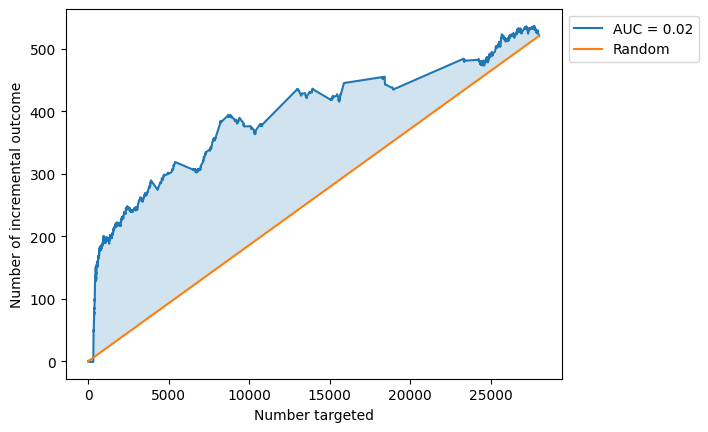

In [26]:
plot_qini_curve(y_val, y_pred_val, treat_val, perfect=False);

In [27]:
metrics.qini_auc_score(y_val, y_pred_val, treat_val)

0.02224139583047751

# Feature importance

In [28]:
feature_importance_1 = pd.DataFrame({'value':model.estimator.get_booster().get_score(importance_type='gain')})\
    .sort_values('value', ascending=False)
feature_importance_1

,value
first_redeem_date,123.613968
monthly_spend_mean,29.564816
express_points_spent_sum,25.840641
express_points_spent_last_month,25.765757
express_points_spent_mean,23.695539
regular_points_spent_mean,21.989727
age,17.294106
days_since_last_transact,14.451057
redeem_delay,14.015310
regular_points_received_last_month,13.926761


In [29]:
feature_importance_1.shape

(18, 1)

## 2nd optimization round

In [30]:
estimator = XGBClassifier(random_state=8, 
                          use_label_encoder=False)

In [31]:
model = ClassTransformation(estimator = estimator)

In [32]:
uplift_scorer = metrics.make_uplift_scorer("qini_auc_score", treat_train)

In [33]:
params = {
    'estimator__n_estimators': [20, 25, 35],
    'estimator__learning_rate': [0.03, 0.05, 0.07],
    'estimator__max_depth': [3, 4, 5],
    'estimator__reg_alpha': [0.03, 0.05, 1],
    'estimator__reg_lambda': [0, 0.03, 0.05]
}

In [34]:
grid_search = GridSearchCV(model,
                           param_grid=params,
                           scoring=uplift_scorer,
                           cv=5,
                           verbose=4
                          )

In [35]:
%%time
%%chime
grid_search = grid_search.fit(
    X=X_train,
    y=y_train,
    treatment=treat_train
)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[19:05:29] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.022 total time=   0.8s
[19:05:30] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.026 total time=   0.8s
[19:05:31] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.020 total time=   0.8s
[19:05:32] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.025 total time=   0.8s
[19:05:33] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.026 total time=   0.8s
[19:05:33] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.022 total time=   0.8s
[19:05:34] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.026 total time=   0.8s
[19:05:35] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.020 total time=   0.8s
[19:05:36] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.025 total time=   0.8s
[19:05:37] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.026 total time=   0.8s
[19:05:38] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.022 total time=   0.9s
[19:05:38] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.026 total time=   0.8s
[19:05:39] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.020 total time=   0.8s
[19:05:40] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.025 total time=   0.7s
[19:05:41] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.026 total time=   0.8s
[19:05:42] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.022 total time=   0.8s
[19:05:42] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.026 total time=   1.1s
[19:05:43] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.020 total time=   0.9s
[19:05:44] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.025 total time=   0.9s
[19:05:45] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.026 total time=   0.8s
[19:05:46] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.022 total time=   0.8s
[19:05:47] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.026 total time=   0.8s
[19:05:48] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.020 total time=   0.8s
[19:05:48] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.025 total time=   0.8s
[19:05:49] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.026 total time=   0.8s
[19:05:50] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.022 total time=   0.8s
[19:05:51] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.026 total time=   0.8s
[19:05:52] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.020 total time=   0.8s
[19:05:52] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.025 total time=   0.8s
[19:05:53] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.026 total time=   0.8s
[19:05:54] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.022 total time=   0.8s
[19:05:55] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.026 total time=   0.8s
[19:05:56] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.020 total time=   0.8s
[19:05:57] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.026 total time=   0.8s
[19:05:57] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.026 total time=   0.9s
[19:05:58] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.022 total time=   0.8s
[19:05:59] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.026 total time=   0.8s
[19:06:00] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.021 total time=   0.8s
[19:06:01] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.026 total time=   0.8s
[19:06:01] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.026 total time=   0.8s
[19:06:02] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.022 total time=   0.8s
[19:06:03] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.026 total time=   0.8s
[19:06:04] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.021 total time=   0.8s
[19:06:05] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.026 total time=   0.8s
[19:06:06] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.026 total time=   0.8s
[19:06:06] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.023 total time=   1.0s
[19:06:07] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.026 total time=   1.0s
[19:06:08] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.020 total time=   1.0s
[19:06:09] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.027 total time=   0.9s
[19:06:10] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.027 total time=   1.0s
[19:06:11] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.023 total time=   0.9s
[19:06:12] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.026 total time=   1.0s
[19:06:13] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.020 total time=   1.0s
[19:06:14] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.027 total time=   1.0s
[19:06:15] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.027 total time=   0.9s
[19:06:16] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.023 total time=   1.0s
[19:06:17] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.026 total time=   1.0s
[19:06:18] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.020 total time=   1.0s
[19:06:19] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.027 total time=   1.0s
[19:06:20] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.026 total time=   0.9s
[19:06:21] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.024 total time=   0.9s
[19:06:22] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.026 total time=   0.9s
[19:06:23] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.020 total time=   0.9s
[19:06:24] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.027 total time=   0.9s
[19:06:25] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.026 total time=   1.0s
[19:06:26] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.023 total time=   0.9s
[19:06:27] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.026 total time=   1.0s
[19:06:28] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.020 total time=   1.0s
[19:06:29] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.027 total time=   0.9s
[19:06:30] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.026 total time=   1.0s
[19:06:31] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.023 total time=   0.9s
[19:06:32] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.026 total time=   1.0s
[19:06:33] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.020 total time=   1.0s
[19:06:34] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.027 total time=   0.9s
[19:06:34] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.026 total time=   1.0s
[19:06:35] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.023 total time=   1.0s
[19:06:36] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.026 total time=   1.0s
[19:06:37] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.021 total time=   0.9s
[19:06:38] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.027 total time=   0.9s
[19:06:39] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.027 total time=   0.9s
[19:06:40] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.023 total time=   0.9s
[19:06:41] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.026 total time=   0.9s
[19:06:42] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.021 total time=   1.0s
[19:06:43] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.027 total time=   0.9s
[19:06:44] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.027 total time=   1.0s
[19:06:45] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.023 total time=   1.0s
[19:06:46] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.026 total time=   1.0s
[19:06:47] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.021 total time=   0.9s
[19:06:48] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.027 total time=   0.9s
[19:06:49] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.027 total time=   1.0s
[19:06:50] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.025 total time=   1.3s
[19:06:51] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.026 total time=   1.3s
[19:06:52] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.020 total time=   1.3s
[19:06:54] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.028 total time=   1.4s
[19:06:55] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.028 total time=   1.3s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:06:57] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.025 total time=   1.4s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:06:58] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.026 total time=   1.4s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:06:59] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.020 total time=   1.3s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:07:01] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.028 total time=   1.3s
[19:07:02] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.028 total time=   1.4s
[19:07:03] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.025 total time=   1.3s
[19:07:05] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.026 total time=   1.3s
[19:07:06] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.020 total time=   1.2s
[19:07:07] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.027 total time=   1.2s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:07:08] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.028 total time=   1.3s
[19:07:10] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.025 total time=   1.3s
[19:07:11] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.026 total time=   1.3s
[19:07:12] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.020 total time=   1.4s
[19:07:14] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.028 total time=   1.3s
[19:07:15] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.028 total time=   1.3s
[19:07:16] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.025 total time=   1.3s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:07:18] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.026 total time=   1.3s
[19:07:19] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.020 total time=   1.3s
[19:07:20] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.027 total time=   1.2s
[19:07:21] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.028 total time=   1.3s
[19:07:23] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.025 total time=   1.3s
[19:07:24] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.027 total time=   1.3s
[19:07:25] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.020 total time=   1.3s
[19:07:27] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.027 total time=   1.4s
[19:07:28] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.028 total time=   1.3s
[19:07:29] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.025 total time=   1.3s
[19:07:31] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.026 total time=   1.3s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:07:32] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.020 total time=   1.4s
[19:07:33] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.028 total time=   1.3s
[19:07:35] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.028 total time=   1.3s
[19:07:36] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.025 total time=   1.3s
[19:07:37] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.026 total time=   1.3s
[19:07:39] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.020 total time=   1.3s
[19:07:40] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.028 total time=   1.3s
[19:07:41] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.028 total time=   1.3s
[19:07:42] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.025 total time=   1.6s
[19:07:44] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.026 total time=   1.4s
[19:07:45] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.020 total time=   1.3s
[19:07:47] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.028 total time=   1.3s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:07:48] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END estimator__learning_rate=0.03, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.028 total time=   1.3s
[19:07:49] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.023 total time=   1.0s
[19:07:50] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.026 total time=   1.0s
[19:07:51] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.019 total time=   1.0s
[19:07:52] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.025 total time=   1.0s
[19:07:53] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.022 total time=   1.0s
[19:07:54] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.023 total time=   1.0s
[19:07:55] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.027 total time=   1.0s
[19:07:56] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.019 total time=   1.0s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:07:58] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.025 total time=   1.1s
[19:07:59] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.023 total time=   1.0s
[19:08:00] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.023 total time=   1.0s
[19:08:01] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.026 total time=   1.0s
[19:08:02] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.019 total time=   1.0s
[19:08:03] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.025 total time=   1.0s
[19:08:04] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.022 total time=   1.0s
[19:08:05] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.023 total time=   1.0s
[19:08:06] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.026 total time=   1.0s
[19:08:07] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.019 total time=   1.0s
[19:08:08] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.025 total time=   1.0s
[19:08:09] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.022 total time=   1.0s
[19:08:10] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.023 total time=   1.0s
[19:08:11] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.026 total time=   1.0s
[19:08:12] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.019 total time=   1.1s
[19:08:13] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.025 total time=   1.0s
[19:08:14] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.023 total time=   1.0s
[19:08:15] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.023 total time=   1.0s
[19:08:16] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.026 total time=   1.0s
[19:08:17] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.019 total time=   1.0s
[19:08:18] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.025 total time=   1.0s
[19:08:19] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.023 total time=   1.0s
[19:08:20] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.023 total time=   1.0s
[19:08:21] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.027 total time=   1.0s
[19:08:22] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.018 total time=   1.0s
[19:08:23] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.024 total time=   1.0s
[19:08:24] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.024 total time=   1.0s
[19:08:25] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.023 total time=   1.0s
[19:08:26] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.027 total time=   1.0s
[19:08:27] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.019 total time=   1.1s
[19:08:28] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.024 total time=   1.0s
[19:08:29] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.024 total time=   1.0s
[19:08:30] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.023 total time=   1.0s
[19:08:31] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.027 total time=   1.0s
[19:08:32] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.019 total time=   1.0s
[19:08:33] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.024 total time=   1.0s
[19:08:34] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.024 total time=   1.0s
[19:08:35] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.024 total time=   1.2s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:08:37] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.026 total time=   1.3s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:08:38] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.019 total time=   1.3s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:08:39] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.024 total time=   1.3s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:08:40] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.021 total time=   1.3s
[19:08:42] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.024 total time=   1.3s
[19:08:43] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.028 total time=   1.2s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:08:44] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.019 total time=   1.3s
[19:08:46] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.023 total time=   1.2s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:08:47] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.022 total time=   1.3s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:08:48] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.024 total time=   1.3s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:08:49] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.026 total time=   1.3s
[19:08:51] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.019 total time=   1.2s
[19:08:52] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.023 total time=   1.2s
[19:08:53] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.022 total time=   1.2s
[19:08:54] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.024 total time=   1.3s
[19:08:56] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.026 total time=   1.2s
[19:08:57] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.019 total time=   1.3s
[19:08:58] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.023 total time=   1.2s
[19:09:00] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.022 total time=   1.2s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:09:01] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.024 total time=   1.4s
[19:09:02] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.026 total time=   1.2s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:09:03] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.019 total time=   1.3s
[19:09:05] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.023 total time=   1.2s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:09:06] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.023 total time=   1.3s
[19:09:07] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.024 total time=   1.2s
[19:09:08] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.026 total time=   1.2s
[19:09:10] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.019 total time=   1.2s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:09:11] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.023 total time=   1.3s
[19:09:12] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.023 total time=   1.3s
[19:09:13] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.024 total time=   1.2s
[19:09:15] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.027 total time=   1.2s
[19:09:16] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.019 total time=   1.2s
[19:09:17] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.025 total time=   1.2s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:09:18] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.023 total time=   1.3s
[19:09:20] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.023 total time=   1.2s
[19:09:21] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.027 total time=   1.2s
[19:09:22] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.019 total time=   1.2s
[19:09:23] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.024 total time=   1.2s
[19:09:25] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.023 total time=   1.3s
[19:09:26] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.023 total time=   1.2s
[19:09:27] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.027 total time=   1.4s
[19:09:28] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.019 total time=   1.2s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:09:30] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.024 total time=   1.3s
[19:09:31] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.023 total time=   1.3s
[19:09:32] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.024 total time=   1.7s
[19:09:34] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.027 total time=   1.7s
[19:09:36] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.022 total time=   1.7s
[19:09:37] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.023 total time=   1.7s
[19:09:39] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.022 total time=   1.7s
[19:09:41] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.025 total time=   1.7s
[19:09:43] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.027 total time=   1.9s
[19:09:44] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.021 total time=   1.8s
[19:09:46] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.023 total time=   1.7s
[19:09:48] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.023 total time=   1.7s
[19:09:50] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.025 total time=   1.8s
[19:09:52] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.027 total time=   1.7s
[19:09:53] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.022 total time=   1.7s
[19:09:55] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.023 total time=   1.7s
[19:09:57] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.023 total time=   1.8s
[19:09:59] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.024 total time=   1.7s
[19:10:00] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.027 total time=   1.7s
[19:10:02] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.021 total time=   1.7s
[19:10:04] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.023 total time=   1.7s
[19:10:05] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.023 total time=   1.7s
[19:10:07] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.025 total time=   1.7s
[19:10:09] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.027 total time=   1.7s
[19:10:10] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.021 total time=   1.7s
[19:10:12] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.023 total time=   1.7s
[19:10:14] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.024 total time=   1.8s
[19:10:16] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.025 total time=   1.7s
[19:10:17] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.027 total time=   1.7s
[19:10:19] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.021 total time=   1.7s
[19:10:21] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.022 total time=   1.7s
[19:10:22] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.024 total time=   1.7s
[19:10:24] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.024 total time=   1.7s
[19:10:26] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.027 total time=   1.7s
[19:10:28] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.020 total time=   1.7s
[19:10:29] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.024 total time=   1.7s
[19:10:31] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.022 total time=   1.7s
[19:10:33] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.024 total time=   1.7s
[19:10:34] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.027 total time=   1.7s
[19:10:36] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.020 total time=   1.7s
[19:10:38] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.024 total time=   1.7s
[19:10:40] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.023 total time=   1.7s
[19:10:41] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.024 total time=   1.8s
[19:10:43] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.027 total time=   1.7s
[19:10:45] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.020 total time=   1.8s
[19:10:47] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.024 total time=   1.7s
[19:10:48] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.03, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.023 total time=   1.7s
[19:10:50] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.025 total time=   1.2s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:10:51] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.023 total time=   1.3s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:10:53] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.020 total time=   1.3s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:10:54] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.024 total time=   1.3s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:10:55] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.023 total time=   1.3s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:10:57] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.024 total time=   1.4s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:10:58] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.023 total time=   1.3s
[19:10:59] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.021 total time=   1.3s
[19:11:01] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.024 total time=   1.2s
[19:11:02] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.023 total time=   1.2s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:11:03] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.024 total time=   1.3s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:11:04] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.023 total time=   1.3s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:11:06] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.021 total time=   1.3s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:11:07] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.023 total time=   1.3s
[19:11:08] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.022 total time=   1.2s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:11:10] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.024 total time=   1.3s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:11:11] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.023 total time=   1.3s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:11:12] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.020 total time=   1.3s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:11:14] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.024 total time=   1.3s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:11:15] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.023 total time=   1.3s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:11:16] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.024 total time=   1.3s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:11:17] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.023 total time=   1.3s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:11:19] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.021 total time=   1.3s
[19:11:20] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.024 total time=   1.2s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:11:21] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.023 total time=   1.3s
[19:11:23] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.024 total time=   1.2s
[19:11:24] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.023 total time=   1.3s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:11:25] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.021 total time=   1.3s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:11:26] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.024 total time=   1.3s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:11:28] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.023 total time=   1.3s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:11:29] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.023 total time=   1.3s
[19:11:30] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.025 total time=   1.2s
[19:11:32] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.020 total time=   1.2s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:11:33] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.025 total time=   1.3s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:11:34] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.022 total time=   1.3s
[19:11:35] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.023 total time=   1.2s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:11:37] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.025 total time=   1.3s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:11:38] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.020 total time=   1.3s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:11:39] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.025 total time=   1.3s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:11:41] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.022 total time=   1.3s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:11:42] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.023 total time=   1.7s
[19:11:44] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.025 total time=   1.2s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:11:45] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.020 total time=   1.3s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:11:46] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.025 total time=   1.3s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:11:48] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.022 total time=   1.3s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:11:49] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.023 total time=   1.6s
[19:11:51] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.023 total time=   1.6s
[19:11:52] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.020 total time=   1.6s
[19:11:54] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.026 total time=   1.6s
[19:11:55] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.022 total time=   1.6s
[19:11:57] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.022 total time=   1.6s
[19:11:59] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.023 total time=   1.6s
[19:12:00] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.021 total time=   1.6s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:12:02] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.023 total time=   1.6s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:12:03] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.022 total time=   1.6s
[19:12:05] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.023 total time=   1.6s
[19:12:07] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.023 total time=   1.6s
[19:12:08] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.021 total time=   1.5s
[19:12:10] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.023 total time=   1.6s
[19:12:11] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.022 total time=   1.6s
[19:12:13] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.023 total time=   1.6s
[19:12:14] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.023 total time=   1.6s
[19:12:16] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.020 total time=   1.6s
[19:12:18] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.024 total time=   1.6s
[19:12:19] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.021 total time=   1.6s
[19:12:21] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.022 total time=   1.5s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:12:22] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.023 total time=   1.7s
[19:12:24] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.021 total time=   1.6s
[19:12:26] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.024 total time=   1.5s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:12:27] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.021 total time=   1.7s
[19:12:29] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.023 total time=   1.6s
[19:12:31] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.023 total time=   1.6s
[19:12:32] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.020 total time=   1.5s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:12:34] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.024 total time=   1.7s
[19:12:35] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.022 total time=   1.6s
[19:12:37] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.023 total time=   1.6s
[19:12:39] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.025 total time=   1.6s
[19:12:40] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.020 total time=   1.6s
[19:12:42] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.024 total time=   1.7s
[19:12:44] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.021 total time=   1.6s
[19:12:45] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.023 total time=   1.6s
[19:12:47] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.026 total time=   1.6s
[19:12:48] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.020 total time=   1.6s
[19:12:50] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.025 total time=   1.6s
[19:12:52] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.021 total time=   1.6s
[19:12:53] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.024 total time=   1.5s
[19:12:55] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.025 total time=   1.6s
[19:12:56] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.020 total time=   1.6s
[19:12:58] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.026 total time=   1.6s
[19:13:00] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.021 total time=   1.6s
[19:13:01] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.023 total time=   2.1s
[19:13:03] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.023 total time=   2.1s
[19:13:05] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.021 total time=   2.1s
[19:13:08] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.024 total time=   2.0s
[19:13:10] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.022 total time=   2.1s
[19:13:12] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.022 total time=   2.1s
[19:13:14] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.024 total time=   2.2s
[19:13:16] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.022 total time=   2.1s
[19:13:18] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.024 total time=   2.1s
[19:13:20] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.021 total time=   2.1s
[19:13:22] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.022 total time=   2.1s
[19:13:24] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.024 total time=   2.1s
[19:13:27] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.022 total time=   2.2s
[19:13:29] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.023 total time=   2.1s
[19:13:31] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.021 total time=   2.1s
[19:13:33] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.022 total time=   2.1s
[19:13:35] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.024 total time=   2.1s
[19:13:37] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.020 total time=   2.1s
[19:13:39] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.024 total time=   2.1s
[19:13:41] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.022 total time=   2.3s
[19:13:44] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.022 total time=   2.1s
[19:13:46] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.024 total time=   2.0s
[19:13:48] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.021 total time=   2.0s
[19:13:50] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.023 total time=   2.0s
[19:13:52] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.021 total time=   2.0s
[19:13:54] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.022 total time=   2.1s
[19:13:56] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.024 total time=   2.0s
[19:13:58] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.022 total time=   2.0s
[19:14:00] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.024 total time=   2.0s
[19:14:02] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.021 total time=   2.0s
[19:14:04] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.022 total time=   2.0s
[19:14:06] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.027 total time=   2.1s
[19:14:08] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.020 total time=   2.1s
[19:14:10] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.025 total time=   2.1s
[19:14:12] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.021 total time=   2.2s
[19:14:15] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.023 total time=   2.1s
[19:14:17] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.027 total time=   2.1s
[19:14:19] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.020 total time=   2.1s
[19:14:21] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.024 total time=   2.1s
[19:14:23] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.022 total time=   2.1s
[19:14:25] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.023 total time=   2.1s
[19:14:27] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.027 total time=   2.1s
[19:14:29] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.020 total time=   2.1s
[19:14:32] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.025 total time=   2.1s
[19:14:34] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.03, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.022 total time=   2.1s
[19:14:36] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.025 total time=   0.8s
[19:14:37] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.027 total time=   0.8s
[19:14:37] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.021 total time=   0.8s
[19:14:38] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.027 total time=   0.8s
[19:14:39] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.027 total time=   0.8s
[19:14:40] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.024 total time=   0.8s
[19:14:41] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.027 total time=   0.8s
[19:14:41] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.021 total time=   0.8s
[19:14:42] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.027 total time=   0.9s
[19:14:43] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.026 total time=   0.8s
[19:14:44] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.024 total time=   0.8s
[19:14:45] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.027 total time=   0.8s
[19:14:46] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.021 total time=   0.8s
[19:14:46] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.027 total time=   0.8s
[19:14:47] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.026 total time=   0.8s
[19:14:48] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.024 total time=   0.8s
[19:14:49] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.027 total time=   0.8s
[19:14:50] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.021 total time=   0.8s
[19:14:50] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.027 total time=   0.8s
[19:14:51] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.027 total time=   0.8s
[19:14:52] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.024 total time=   0.8s
[19:14:53] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.027 total time=   0.8s
[19:14:54] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.021 total time=   0.8s
[19:14:54] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.027 total time=   0.8s
[19:14:55] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.027 total time=   0.8s
[19:14:56] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.024 total time=   0.8s
[19:14:57] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.027 total time=   0.9s
[19:14:58] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.021 total time=   0.8s
[19:14:59] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.027 total time=   0.8s
[19:14:59] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.027 total time=   0.8s
[19:15:00] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.025 total time=   0.8s
[19:15:01] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.027 total time=   0.8s
[19:15:02] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.020 total time=   0.8s
[19:15:03] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.026 total time=   0.8s
[19:15:03] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.027 total time=   0.8s
[19:15:04] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.025 total time=   0.8s
[19:15:05] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.027 total time=   0.8s
[19:15:06] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.020 total time=   0.8s
[19:15:07] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.026 total time=   0.8s
[19:15:08] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.027 total time=   0.8s
[19:15:08] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.025 total time=   0.8s
[19:15:09] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.027 total time=   0.8s
[19:15:10] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.020 total time=   0.8s
[19:15:11] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.026 total time=   0.8s
[19:15:12] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.027 total time=   0.8s
[19:15:12] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.024 total time=   1.0s
[19:15:13] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.027 total time=   0.9s
[19:15:14] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.020 total time=   1.0s
[19:15:15] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.028 total time=   0.9s
[19:15:16] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.027 total time=   1.0s
[19:15:17] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.025 total time=   0.9s
[19:15:18] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.027 total time=   0.9s
[19:15:19] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.020 total time=   1.0s
[19:15:20] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.028 total time=   0.9s
[19:15:21] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.027 total time=   1.0s
[19:15:22] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.025 total time=   0.9s
[19:15:23] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.027 total time=   0.9s
[19:15:24] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.020 total time=   1.0s
[19:15:25] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.028 total time=   0.9s
[19:15:26] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.027 total time=   0.9s
[19:15:27] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.025 total time=   1.0s
[19:15:28] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.027 total time=   0.9s
[19:15:29] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.020 total time=   1.0s
[19:15:30] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.028 total time=   0.9s
[19:15:31] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.027 total time=   0.9s
[19:15:32] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.025 total time=   0.9s
[19:15:33] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.027 total time=   0.9s
[19:15:34] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.020 total time=   1.0s
[19:15:35] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.028 total time=   1.0s
[19:15:36] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.027 total time=   1.0s
[19:15:37] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.025 total time=   1.0s
[19:15:38] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.027 total time=   0.9s
[19:15:39] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.020 total time=   1.0s
[19:15:40] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.028 total time=   0.9s
[19:15:40] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.027 total time=   0.9s
[19:15:41] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.025 total time=   0.9s
[19:15:42] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.026 total time=   1.2s
[19:15:44] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.019 total time=   0.9s
[19:15:45] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.026 total time=   1.0s
[19:15:46] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.028 total time=   0.9s
[19:15:46] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.025 total time=   0.9s
[19:15:47] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.026 total time=   0.9s
[19:15:48] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.019 total time=   0.9s
[19:15:49] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.026 total time=   0.9s
[19:15:50] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.028 total time=   0.9s
[19:15:51] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.025 total time=   0.9s
[19:15:52] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.026 total time=   0.9s
[19:15:53] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.019 total time=   0.9s
[19:15:54] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.026 total time=   0.9s
[19:15:55] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.028 total time=   0.9s
[19:15:56] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.025 total time=   1.2s
[19:15:57] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.026 total time=   1.2s
[19:15:58] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.020 total time=   1.2s
[19:15:59] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.027 total time=   1.2s
[19:16:01] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.027 total time=   1.2s
[19:16:02] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.024 total time=   1.2s
[19:16:03] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.026 total time=   1.2s
[19:16:04] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.020 total time=   1.3s
[19:16:06] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.027 total time=   1.2s
[19:16:07] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.027 total time=   1.3s
[19:16:08] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.024 total time=   1.2s
[19:16:09] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.026 total time=   1.2s
[19:16:11] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.020 total time=   1.3s
[19:16:12] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.027 total time=   1.4s
[19:16:13] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.027 total time=   1.3s
[19:16:15] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.025 total time=   1.3s
[19:16:16] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.026 total time=   1.2s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:16:17] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.020 total time=   1.4s
[19:16:19] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.027 total time=   1.3s
[19:16:20] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.027 total time=   1.3s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:16:21] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.024 total time=   1.3s
[19:16:22] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.026 total time=   1.3s
[19:16:24] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.020 total time=   1.3s
[19:16:25] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.027 total time=   1.2s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:16:26] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.027 total time=   1.3s
[19:16:28] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.025 total time=   1.2s
[19:16:29] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.026 total time=   1.2s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:16:30] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.020 total time=   1.3s
[19:16:31] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.027 total time=   1.2s
[19:16:33] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.027 total time=   1.3s
[19:16:34] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.026 total time=   1.3s
[19:16:35] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.027 total time=   1.3s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:16:37] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.020 total time=   1.3s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:16:38] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.026 total time=   1.3s
[19:16:39] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.028 total time=   1.3s
[19:16:41] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.026 total time=   1.2s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:16:42] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.027 total time=   1.4s
[19:16:43] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.020 total time=   1.3s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:16:45] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.026 total time=   1.3s
[19:16:46] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.028 total time=   1.3s
[19:16:47] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.026 total time=   1.3s
[19:16:48] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.027 total time=   1.2s
[19:16:50] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.021 total time=   1.3s
[19:16:51] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.026 total time=   1.3s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:16:52] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.028 total time=   1.3s
[19:16:54] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.024 total time=   1.0s
[19:16:54] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.027 total time=   1.0s
[19:16:56] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.020 total time=   1.0s
[19:16:57] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.023 total time=   1.0s
[19:16:58] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.021 total time=   1.1s
[19:16:59] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.024 total time=   1.0s
[19:17:00] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.027 total time=   1.0s
[19:17:01] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.020 total time=   1.0s
[19:17:02] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.024 total time=   1.0s
[19:17:03] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.021 total time=   1.0s
[19:17:04] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.024 total time=   1.0s
[19:17:05] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.027 total time=   1.0s
[19:17:06] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.020 total time=   1.0s
[19:17:07] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.022 total time=   1.0s
[19:17:08] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.022 total time=   1.0s
[19:17:09] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.024 total time=   1.0s
[19:17:10] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.027 total time=   1.0s
[19:17:11] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.020 total time=   1.0s
[19:17:12] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.022 total time=   1.0s
[19:17:13] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.021 total time=   1.0s
[19:17:14] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.024 total time=   1.0s
[19:17:15] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.027 total time=   1.0s
[19:17:16] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.020 total time=   1.0s
[19:17:17] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.022 total time=   1.0s
[19:17:18] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.022 total time=   1.0s
[19:17:19] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.024 total time=   1.0s
[19:17:20] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.027 total time=   1.0s
[19:17:21] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.020 total time=   1.0s
[19:17:22] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.021 total time=   1.0s
[19:17:23] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.022 total time=   1.0s
[19:17:24] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.024 total time=   1.0s
[19:17:25] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.027 total time=   1.0s
[19:17:26] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.020 total time=   1.0s
[19:17:27] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.024 total time=   1.1s
[19:17:28] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.022 total time=   1.1s
[19:17:29] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.025 total time=   1.1s
[19:17:30] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.027 total time=   1.0s
[19:17:31] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.020 total time=   1.0s
[19:17:32] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.023 total time=   1.0s
[19:17:33] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.022 total time=   1.0s
[19:17:34] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.025 total time=   1.0s
[19:17:35] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.027 total time=   1.0s
[19:17:36] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.020 total time=   1.0s
[19:17:37] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.023 total time=   1.0s
[19:17:38] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.022 total time=   1.0s
[19:17:39] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.024 total time=   1.2s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:17:40] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.025 total time=   1.3s
[19:17:42] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.020 total time=   1.6s
[19:17:43] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.024 total time=   1.2s
[19:17:45] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.022 total time=   1.2s
[19:17:46] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.024 total time=   1.2s
[19:17:47] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.026 total time=   1.2s
[19:17:48] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.021 total time=   1.2s
[19:17:49] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.024 total time=   1.2s
[19:17:51] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.022 total time=   1.2s
[19:17:52] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.024 total time=   1.2s
[19:17:53] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.026 total time=   1.2s
[19:17:54] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.021 total time=   1.2s
[19:17:55] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.020 total time=   1.2s
[19:17:56] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.022 total time=   1.2s
[19:17:58] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.024 total time=   1.2s
[19:17:59] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.026 total time=   1.2s
[19:18:00] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.020 total time=   1.2s
[19:18:01] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.024 total time=   1.2s
[19:18:02] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.022 total time=   1.2s
[19:18:04] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.024 total time=   1.2s
[19:18:05] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.026 total time=   1.2s
[19:18:06] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.022 total time=   1.2s
[19:18:07] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.020 total time=   1.2s
[19:18:08] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.022 total time=   1.2s
[19:18:10] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.024 total time=   1.2s
[19:18:11] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.026 total time=   1.2s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:18:12] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.020 total time=   1.3s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:18:13] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.022 total time=   1.3s
[19:18:15] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.022 total time=   1.2s
[19:18:16] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.024 total time=   1.2s
[19:18:17] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.026 total time=   1.2s
[19:18:18] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.020 total time=   1.2s
[19:18:20] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.023 total time=   1.2s
[19:18:21] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.022 total time=   1.2s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:18:22] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.024 total time=   1.3s
[19:18:23] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.026 total time=   1.2s
[19:18:25] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.020 total time=   1.2s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:18:26] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.022 total time=   1.3s
[19:18:27] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.022 total time=   1.4s
[19:18:28] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.024 total time=   1.2s
[19:18:30] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.026 total time=   1.2s
[19:18:31] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.020 total time=   1.2s
[19:18:32] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.023 total time=   1.2s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:18:33] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.022 total time=   1.3s
[19:18:35] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.022 total time=   1.8s
[19:18:36] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.026 total time=   1.7s
[19:18:38] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.023 total time=   1.7s
[19:18:40] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.024 total time=   1.7s
[19:18:42] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.021 total time=   1.8s
[19:18:43] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.022 total time=   1.7s
[19:18:45] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.026 total time=   1.7s
[19:18:47] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.023 total time=   1.7s
[19:18:49] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.022 total time=   1.7s
[19:18:50] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.022 total time=   1.7s
[19:18:52] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.022 total time=   1.7s
[19:18:54] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.026 total time=   1.7s
[19:18:55] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.023 total time=   1.7s
[19:18:57] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.022 total time=   1.7s
[19:18:59] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.021 total time=   1.7s
[19:19:00] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.022 total time=   1.8s
[19:19:02] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.026 total time=   1.7s
[19:19:04] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.023 total time=   1.7s
[19:19:06] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.024 total time=   1.7s
[19:19:07] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.022 total time=   1.7s
[19:19:09] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.022 total time=   1.7s
[19:19:11] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.026 total time=   1.7s
[19:19:12] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.023 total time=   1.8s
[19:19:14] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.022 total time=   1.7s
[19:19:16] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.021 total time=   1.7s
[19:19:18] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.023 total time=   1.7s
[19:19:19] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.026 total time=   1.6s
[19:19:21] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.022 total time=   1.7s
[19:19:23] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.022 total time=   1.7s
[19:19:24] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.021 total time=   1.7s
[19:19:26] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.023 total time=   1.7s
[19:19:28] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.025 total time=   1.7s
[19:19:30] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.021 total time=   1.7s
[19:19:31] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.023 total time=   1.7s
[19:19:33] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.023 total time=   1.7s
[19:19:35] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.024 total time=   1.7s
[19:19:37] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.026 total time=   1.7s
[19:19:38] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.021 total time=   1.7s
[19:19:40] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.023 total time=   1.7s
[19:19:42] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.023 total time=   1.9s
[19:19:44] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.024 total time=   1.7s
[19:19:45] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.026 total time=   1.6s
[19:19:47] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.021 total time=   1.6s
[19:19:49] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.024 total time=   1.6s
[19:19:50] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.023 total time=   1.7s
[19:19:52] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.022 total time=   1.2s
[19:19:53] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.025 total time=   1.2s
[19:19:54] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.020 total time=   1.2s
[19:19:56] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.022 total time=   1.2s
[19:19:57] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.022 total time=   1.2s
[19:19:58] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.021 total time=   1.2s
[19:19:59] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.025 total time=   1.2s
[19:20:01] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.021 total time=   1.2s
[19:20:02] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.023 total time=   1.2s
[19:20:03] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.021 total time=   1.2s
[19:20:04] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.021 total time=   1.2s
[19:20:05] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.025 total time=   1.2s
[19:20:07] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.021 total time=   1.2s
[19:20:08] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.022 total time=   1.2s
[19:20:09] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.022 total time=   1.2s
[19:20:10] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.022 total time=   1.2s
[19:20:11] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.026 total time=   1.2s
[19:20:13] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.020 total time=   1.2s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:20:14] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.023 total time=   1.3s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:20:15] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.021 total time=   1.3s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:20:17] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.022 total time=   1.3s
[19:20:18] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.027 total time=   1.2s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:20:19] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.021 total time=   1.3s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:20:20] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.022 total time=   1.3s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:20:22] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.023 total time=   1.3s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:20:23] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.023 total time=   1.3s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:20:24] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.027 total time=   1.3s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:20:26] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.020 total time=   1.3s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:20:27] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.022 total time=   1.3s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:20:28] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.022 total time=   1.3s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:20:29] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.022 total time=   1.3s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:20:31] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.027 total time=   1.3s
[19:20:32] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.022 total time=   1.3s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:20:33] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.025 total time=   1.3s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:20:35] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.021 total time=   1.3s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:20:36] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.022 total time=   1.3s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:20:37] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.025 total time=   1.3s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:20:39] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.022 total time=   1.6s
[19:20:40] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.025 total time=   1.2s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:20:41] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.021 total time=   1.3s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:20:43] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.022 total time=   1.3s
[19:20:44] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.026 total time=   1.3s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:20:45] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.020 total time=   1.3s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:20:47] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.025 total time=   1.3s
[19:20:48] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.021 total time=   1.2s
[19:20:49] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.022 total time=   1.6s
[19:20:51] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.026 total time=   1.6s
[19:20:52] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.020 total time=   1.5s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:20:54] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.023 total time=   1.7s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:20:56] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.021 total time=   1.6s
[19:20:57] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.021 total time=   1.7s
[19:20:59] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.026 total time=   1.6s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:21:00] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.022 total time=   1.6s
[19:21:02] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.022 total time=   1.6s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:21:04] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.022 total time=   1.7s
[19:21:05] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.020 total time=   1.6s
[19:21:07] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.026 total time=   1.6s
[19:21:08] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.021 total time=   1.6s
[19:21:10] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.021 total time=   1.6s
[19:21:12] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.022 total time=   1.6s
[19:21:13] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.022 total time=   1.6s
[19:21:15] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.025 total time=   1.5s
[19:21:16] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.021 total time=   1.6s
[19:21:18] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.022 total time=   1.5s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:21:20] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.022 total time=   1.6s
[19:21:21] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.022 total time=   1.6s
[19:21:23] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.026 total time=   1.5s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:21:24] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.021 total time=   1.7s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:21:26] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.021 total time=   1.6s
[19:21:28] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.022 total time=   1.6s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:21:29] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.022 total time=   1.6s
[19:21:31] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.026 total time=   1.6s
[19:21:33] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.019 total time=   1.6s
[19:21:34] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.021 total time=   1.6s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:21:36] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.022 total time=   1.6s
[19:21:37] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.022 total time=   1.6s
[19:21:39] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.027 total time=   1.6s
[19:21:41] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.022 total time=   1.6s
[19:21:42] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.022 total time=   1.9s
[19:21:44] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.021 total time=   1.6s
[19:21:46] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.022 total time=   1.5s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:21:47] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.025 total time=   1.6s
[19:21:49] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.023 total time=   1.6s
[19:21:50] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.022 total time=   1.6s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:21:52] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.021 total time=   1.6s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:21:54] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.022 total time=   1.7s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:21:55] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.024 total time=   1.6s
[19:21:57] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.023 total time=   1.6s
[19:21:59] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.022 total time=   1.6s
[19:22:00] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.021 total time=   1.6s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:22:02] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.021 total time=   2.2s
[19:22:04] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.025 total time=   2.1s
[19:22:06] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.022 total time=   2.1s
[19:22:08] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.021 total time=   2.1s
[19:22:10] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.020 total time=   2.1s
[19:22:12] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.021 total time=   2.1s
[19:22:15] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.024 total time=   2.1s
[19:22:17] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.023 total time=   2.1s
[19:22:19] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.022 total time=   2.1s
[19:22:21] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.022 total time=   2.1s
[19:22:23] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.019 total time=   2.1s
[19:22:25] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.025 total time=   2.1s
[19:22:27] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.022 total time=   2.1s
[19:22:29] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.020 total time=   2.1s
[19:22:31] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.021 total time=   2.1s
[19:22:33] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.020 total time=   2.1s
[19:22:36] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.025 total time=   2.1s
[19:22:38] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.023 total time=   2.1s
[19:22:40] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.021 total time=   2.1s
[19:22:42] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.021 total time=   2.1s
[19:22:44] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.021 total time=   2.1s
[19:22:46] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.026 total time=   2.1s
[19:22:48] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.023 total time=   2.1s
[19:22:50] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.019 total time=   2.1s
[19:22:52] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.021 total time=   2.1s
[19:22:55] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.020 total time=   2.1s
[19:22:57] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.026 total time=   2.1s
[19:22:59] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.020 total time=   2.1s
[19:23:01] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.020 total time=   2.1s
[19:23:03] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.022 total time=   2.1s
[19:23:05] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.021 total time=   2.1s
[19:23:07] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.026 total time=   2.1s
[19:23:09] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.022 total time=   2.1s
[19:23:11] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.022 total time=   2.1s
[19:23:14] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.022 total time=   2.1s
[19:23:16] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.020 total time=   2.1s
[19:23:18] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.025 total time=   2.0s
[19:23:20] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.022 total time=   2.1s
[19:23:22] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.022 total time=   2.1s
[19:23:24] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.021 total time=   2.1s
[19:23:26] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.022 total time=   2.1s
[19:23:28] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.025 total time=   2.1s
[19:23:30] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.022 total time=   2.1s
[19:23:32] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.023 total time=   2.1s
[19:23:35] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.05, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.021 total time=   2.1s
[19:23:37] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.025 total time=   0.8s
[19:23:37] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.027 total time=   0.8s
[19:23:38] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.021 total time=   0.8s
[19:23:39] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.028 total time=   0.8s
[19:23:40] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.028 total time=   0.8s
[19:23:41] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.025 total time=   0.8s
[19:23:41] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.027 total time=   0.8s
[19:23:42] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.021 total time=   1.1s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:23:43] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.028 total time=   0.9s
[19:23:44] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.028 total time=   0.8s
[19:23:45] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.025 total time=   0.8s
[19:23:46] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.027 total time=   0.8s
[19:23:47] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.021 total time=   0.8s
[19:23:48] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.028 total time=   0.8s
[19:23:48] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.028 total time=   0.8s
[19:23:49] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.025 total time=   0.8s
[19:23:50] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.027 total time=   0.8s
[19:23:51] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.020 total time=   0.8s
[19:23:52] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.028 total time=   0.8s
[19:23:52] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.028 total time=   0.8s
[19:23:53] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.025 total time=   0.8s
[19:23:54] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.027 total time=   0.8s
[19:23:55] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.021 total time=   0.8s
[19:23:56] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.028 total time=   0.8s
[19:23:57] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.028 total time=   0.8s
[19:23:57] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.025 total time=   0.9s
[19:23:58] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.027 total time=   0.8s
[19:23:59] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.021 total time=   0.8s
[19:24:00] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.028 total time=   0.8s
[19:24:01] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.028 total time=   0.8s
[19:24:01] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.026 total time=   0.8s
[19:24:02] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.028 total time=   0.8s
[19:24:03] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.019 total time=   0.8s
[19:24:04] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.027 total time=   0.8s
[19:24:05] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.028 total time=   0.8s
[19:24:06] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.026 total time=   0.8s
[19:24:06] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.028 total time=   0.8s
[19:24:07] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.019 total time=   0.8s
[19:24:08] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.025 total time=   0.8s
[19:24:09] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.028 total time=   0.8s
[19:24:10] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.026 total time=   0.8s
[19:24:10] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.027 total time=   0.8s
[19:24:11] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.019 total time=   0.8s
[19:24:12] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.025 total time=   0.8s
[19:24:13] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.028 total time=   0.8s
[19:24:14] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.024 total time=   0.9s
[19:24:15] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.028 total time=   1.0s
[19:24:16] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.020 total time=   0.9s
[19:24:17] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.029 total time=   1.0s
[19:24:17] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.028 total time=   1.0s
[19:24:18] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.024 total time=   1.0s
[19:24:19] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.028 total time=   0.9s
[19:24:20] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.020 total time=   0.9s
[19:24:21] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.029 total time=   1.0s
[19:24:22] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.028 total time=   1.0s
[19:24:23] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.024 total time=   0.9s
[19:24:24] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.028 total time=   1.0s
[19:24:25] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.020 total time=   1.0s
[19:24:26] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.029 total time=   0.9s
[19:24:27] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.028 total time=   1.0s
[19:24:28] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.024 total time=   0.9s
[19:24:29] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.028 total time=   0.9s
[19:24:30] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.020 total time=   0.9s
[19:24:31] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.029 total time=   0.9s
[19:24:32] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.028 total time=   1.0s
[19:24:33] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.024 total time=   1.0s
[19:24:34] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.028 total time=   1.0s
[19:24:35] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.020 total time=   1.0s
[19:24:36] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.029 total time=   1.0s
[19:24:37] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.028 total time=   0.9s
[19:24:38] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.024 total time=   1.0s
[19:24:39] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.028 total time=   0.9s
[19:24:40] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.020 total time=   1.0s
[19:24:41] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.029 total time=   0.9s
[19:24:42] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.028 total time=   1.0s
[19:24:43] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.027 total time=   1.0s
[19:24:44] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.028 total time=   1.0s
[19:24:45] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.019 total time=   1.0s
[19:24:46] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.028 total time=   1.0s
[19:24:46] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.028 total time=   1.0s
[19:24:47] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.027 total time=   1.0s
[19:24:48] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.028 total time=   0.9s
[19:24:49] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.019 total time=   1.0s
[19:24:50] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.027 total time=   1.0s
[19:24:51] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.028 total time=   1.0s
[19:24:52] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.027 total time=   1.0s
[19:24:53] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.027 total time=   1.0s
[19:24:54] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.019 total time=   1.0s
[19:24:55] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.027 total time=   1.0s
[19:24:56] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.028 total time=   1.0s
[19:24:57] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.023 total time=   1.3s
[19:24:59] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.027 total time=   1.2s
[19:25:00] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.021 total time=   1.3s
[19:25:01] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.026 total time=   1.3s
[19:25:02] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.029 total time=   1.3s
[19:25:04] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.023 total time=   1.3s
[19:25:05] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.028 total time=   1.3s
[19:25:06] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.022 total time=   1.3s
[19:25:08] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.027 total time=   1.3s
[19:25:09] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.028 total time=   1.3s
[19:25:10] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.023 total time=   1.2s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:25:11] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.028 total time=   1.3s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:25:13] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.022 total time=   1.4s
[19:25:14] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.027 total time=   1.3s
[19:25:15] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.028 total time=   1.3s
[19:25:17] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.023 total time=   1.3s
[19:25:18] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.028 total time=   1.3s
[19:25:19] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.020 total time=   1.3s
[19:25:21] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.026 total time=   1.3s
[19:25:22] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.028 total time=   1.3s
[19:25:23] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.023 total time=   1.3s
[19:25:24] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.028 total time=   1.3s
[19:25:26] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.022 total time=   1.3s
[19:25:27] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.026 total time=   1.3s
[19:25:28] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.028 total time=   1.3s
[19:25:30] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.023 total time=   1.3s
[19:25:31] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.028 total time=   1.2s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:25:32] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.021 total time=   1.3s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:25:34] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.026 total time=   1.3s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:25:35] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.028 total time=   1.3s
[19:25:36] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.024 total time=   1.3s
[19:25:37] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.028 total time=   1.3s
[19:25:39] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.020 total time=   1.3s
[19:25:40] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.026 total time=   1.3s
[19:25:41] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.027 total time=   1.3s
[19:25:43] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.024 total time=   1.5s
[19:25:44] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.028 total time=   1.4s
[19:25:45] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.020 total time=   1.3s
[19:25:47] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.024 total time=   1.3s
[19:25:48] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.027 total time=   1.3s
[19:25:49] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.024 total time=   1.2s
[19:25:51] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.029 total time=   1.3s
[19:25:52] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.020 total time=   1.3s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:25:53] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.024 total time=   1.3s
[19:25:55] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.07, estimator__max_depth=3, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.027 total time=   1.3s
[19:25:56] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.024 total time=   1.0s
[19:25:57] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.027 total time=   1.1s
[19:25:58] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.021 total time=   1.1s
[19:25:59] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.024 total time=   1.0s
[19:26:00] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.022 total time=   1.0s
[19:26:01] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.025 total time=   1.0s
[19:26:02] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.027 total time=   1.0s
[19:26:03] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.021 total time=   1.0s
[19:26:04] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.024 total time=   1.0s
[19:26:05] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.022 total time=   1.0s
[19:26:06] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.024 total time=   1.0s
[19:26:07] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.027 total time=   1.0s
[19:26:08] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.019 total time=   1.0s
[19:26:09] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.024 total time=   1.0s
[19:26:10] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.022 total time=   1.0s
[19:26:11] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.025 total time=   1.0s
[19:26:12] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.027 total time=   1.1s
[19:26:13] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.021 total time=   1.0s
[19:26:14] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.024 total time=   1.0s
[19:26:15] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.022 total time=   1.0s
[19:26:16] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.024 total time=   1.0s
[19:26:17] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.028 total time=   1.0s
[19:26:18] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.019 total time=   1.0s
[19:26:19] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.024 total time=   1.0s
[19:26:20] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.022 total time=   1.0s
[19:26:21] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.024 total time=   1.0s
[19:26:22] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.028 total time=   1.0s
[19:26:23] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.020 total time=   1.0s
[19:26:24] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.024 total time=   1.0s
[19:26:26] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.022 total time=   1.0s
[19:26:27] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.024 total time=   1.0s
[19:26:28] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.026 total time=   1.0s
[19:26:29] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.020 total time=   1.0s
[19:26:30] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.024 total time=   1.0s
[19:26:31] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.021 total time=   1.0s
[19:26:32] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.024 total time=   1.0s
[19:26:33] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.026 total time=   1.0s
[19:26:34] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.020 total time=   1.0s
[19:26:35] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.024 total time=   1.0s
[19:26:36] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.021 total time=   1.0s
[19:26:37] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.024 total time=   1.0s
[19:26:38] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.026 total time=   1.0s
[19:26:39] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.020 total time=   1.0s
[19:26:40] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.024 total time=   1.0s
[19:26:41] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.021 total time=   1.0s
[19:26:42] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.022 total time=   1.3s
[19:26:43] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.026 total time=   1.2s
[19:26:44] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.022 total time=   1.3s
[19:26:46] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.023 total time=   1.2s
[19:26:47] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.021 total time=   1.2s
[19:26:48] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.023 total time=   1.2s
[19:26:49] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.026 total time=   1.2s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:26:50] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.022 total time=   1.3s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:26:52] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.023 total time=   1.3s
[19:26:53] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.021 total time=   1.2s
[19:26:54] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.023 total time=   1.2s
[19:26:56] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.026 total time=   1.2s
[19:26:57] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.021 total time=   1.3s
[19:26:58] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.024 total time=   1.2s
[19:26:59] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.022 total time=   1.2s
[19:27:00] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.023 total time=   1.2s
[19:27:02] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.026 total time=   1.2s
[19:27:03] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.020 total time=   1.2s
[19:27:04] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.023 total time=   1.2s
[19:27:05] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.021 total time=   1.2s
[19:27:07] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.023 total time=   1.2s
[19:27:08] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.027 total time=   1.2s
[19:27:09] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.021 total time=   1.2s
[19:27:10] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.024 total time=   1.2s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:27:12] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.022 total time=   1.3s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:27:13] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.023 total time=   1.3s
[19:27:14] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.027 total time=   1.2s
[19:27:15] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.022 total time=   1.2s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:27:17] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.024 total time=   1.3s
[19:27:18] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.021 total time=   1.2s
[19:27:19] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.024 total time=   1.2s
[19:27:20] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.025 total time=   1.2s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:27:22] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.022 total time=   1.3s
[19:27:23] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.026 total time=   1.2s
[19:27:24] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.023 total time=   1.2s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:27:25] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.024 total time=   1.3s
[19:27:27] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.026 total time=   1.2s
[19:27:28] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.021 total time=   1.2s
[19:27:29] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.026 total time=   1.2s
[19:27:30] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.023 total time=   1.2s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:27:31] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.024 total time=   1.3s
[19:27:33] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.026 total time=   1.2s
[19:27:34] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.022 total time=   1.2s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:27:35] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.026 total time=   1.3s
[19:27:36] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.023 total time=   1.2s
[19:27:38] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.022 total time=   1.7s
[19:27:39] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.026 total time=   1.7s
[19:27:41] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.022 total time=   1.7s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:27:43] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.021 total time=   2.0s
[19:27:45] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.021 total time=   1.7s
[19:27:47] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.020 total time=   1.7s
[19:27:48] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.026 total time=   1.7s
[19:27:50] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.022 total time=   1.7s
[19:27:52] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.022 total time=   1.7s
[19:27:53] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.021 total time=   1.7s
[19:27:55] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.021 total time=   1.7s
[19:27:57] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.026 total time=   1.7s
[19:27:59] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.022 total time=   1.7s
[19:28:00] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.021 total time=   1.7s
[19:28:02] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.022 total time=   1.7s
[19:28:04] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.020 total time=   1.7s
[19:28:05] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.027 total time=   1.7s
[19:28:07] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.022 total time=   1.7s
[19:28:09] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.022 total time=   1.7s
[19:28:10] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.021 total time=   1.7s
[19:28:12] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.022 total time=   1.7s
[19:28:14] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.026 total time=   1.7s
[19:28:16] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.023 total time=   1.7s
[19:28:17] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.020 total time=   1.7s
[19:28:19] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.022 total time=   1.7s
[19:28:21] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.022 total time=   1.7s
[19:28:22] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.026 total time=   1.7s
[19:28:24] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.023 total time=   1.7s
[19:28:26] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.023 total time=   1.7s
[19:28:28] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.023 total time=   1.7s
[19:28:29] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.021 total time=   1.7s
[19:28:31] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.025 total time=   1.7s
[19:28:33] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.022 total time=   1.7s
[19:28:34] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.023 total time=   1.7s
[19:28:36] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.022 total time=   1.7s
[19:28:38] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.021 total time=   1.7s
[19:28:40] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.026 total time=   1.7s
[19:28:41] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.023 total time=   1.7s
[19:28:43] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.023 total time=   1.7s
[19:28:45] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.022 total time=   1.8s
[19:28:47] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.021 total time=   1.7s
[19:28:48] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.026 total time=   1.7s
[19:28:50] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.024 total time=   1.8s
[19:28:52] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.023 total time=   1.7s
[19:28:53] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.07, estimator__max_depth=4, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.022 total time=   1.8s
[19:28:55] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.020 total time=   1.2s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:28:56] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.024 total time=   1.3s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:28:58] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.020 total time=   1.3s
[19:28:59] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.023 total time=   1.2s
[19:29:00] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.022 total time=   1.4s
[19:29:02] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.024 total time=   1.2s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:29:03] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.024 total time=   1.3s
[19:29:04] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.020 total time=   1.3s
[19:29:05] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.022 total time=   1.2s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:29:07] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.022 total time=   1.3s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:29:08] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.022 total time=   1.3s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:29:09] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.025 total time=   1.3s
[19:29:11] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.021 total time=   1.2s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:29:12] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.022 total time=   1.4s
[19:29:13] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.022 total time=   1.2s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:29:15] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.022 total time=   1.3s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:29:16] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.024 total time=   1.3s
[19:29:17] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.021 total time=   1.2s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:29:18] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.023 total time=   1.3s
[19:29:20] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.022 total time=   1.2s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:29:21] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.022 total time=   1.3s
[19:29:22] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.025 total time=   1.2s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:29:23] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.021 total time=   1.3s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:29:25] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.023 total time=   1.3s
[19:29:26] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.022 total time=   1.2s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:29:27] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.022 total time=   1.3s
[19:29:29] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.024 total time=   1.2s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:29:30] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.021 total time=   1.3s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:29:31] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.023 total time=   1.3s
[19:29:32] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.022 total time=   1.2s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:29:34] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.024 total time=   1.3s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:29:35] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.025 total time=   1.3s
[19:29:36] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.020 total time=   1.2s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:29:38] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.022 total time=   1.3s
[19:29:39] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.022 total time=   1.2s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:29:40] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.023 total time=   1.3s
[19:29:41] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.026 total time=   1.2s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:29:43] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.020 total time=   1.6s
[19:29:44] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.023 total time=   1.3s
[19:29:46] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.021 total time=   1.2s
[19:29:47] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.023 total time=   1.2s
[19:29:48] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.025 total time=   1.2s
[19:29:49] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.019 total time=   1.2s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:29:51] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.023 total time=   1.3s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:29:52] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=20, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.021 total time=   1.3s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:29:53] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.020 total time=   1.6s
[19:29:55] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.024 total time=   1.6s
[19:29:56] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.020 total time=   1.6s
[19:29:58] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.021 total time=   1.5s
[19:29:59] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.021 total time=   1.5s
[19:30:01] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.022 total time=   1.5s
[19:30:03] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.025 total time=   1.5s
[19:30:04] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.021 total time=   1.6s
[19:30:06] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.021 total time=   1.5s
[19:30:07] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.022 total time=   1.6s
[19:30:09] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.022 total time=   1.5s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:30:10] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.024 total time=   1.6s
[19:30:12] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.020 total time=   1.6s
[19:30:13] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.021 total time=   1.5s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:30:15] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.021 total time=   1.6s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:30:17] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.020 total time=   1.6s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:30:18] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.025 total time=   1.6s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:30:20] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.023 total time=   1.6s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:30:22] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.021 total time=   1.6s
[19:30:23] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.022 total time=   1.5s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:30:25] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.022 total time=   1.6s
[19:30:26] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.025 total time=   1.5s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:30:28] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.021 total time=   1.6s
[19:30:30] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.021 total time=   1.6s
[19:30:31] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.021 total time=   1.6s
[19:30:33] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.022 total time=   1.6s
[19:30:34] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.023 total time=   1.6s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:30:36] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.021 total time=   1.6s
[19:30:38] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.023 total time=   1.6s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:30:39] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.021 total time=   1.6s
[19:30:41] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.023 total time=   1.6s
[19:30:42] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.023 total time=   1.6s
[19:30:44] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.020 total time=   1.6s
[19:30:46] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.020 total time=   1.7s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:30:47] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.023 total time=   2.3s
[19:30:50] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.022 total time=   1.6s
[19:30:51] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.026 total time=   1.6s
[19:30:53] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.020 total time=   1.6s
[19:30:55] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.022 total time=   1.6s
[19:30:56] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.020 total time=   1.6s
[19:30:58] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.022 total time=   1.6s
[19:30:59] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.025 total time=   1.5s


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:31:01] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.020 total time=   1.6s
[19:31:03] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.022 total time=   1.6s
[19:31:04] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=25, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.020 total time=   1.6s
[19:31:06] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.021 total time=   2.1s
[19:31:08] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.024 total time=   2.0s
[19:31:10] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.020 total time=   2.1s
[19:31:12] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.021 total time=   2.2s
[19:31:14] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0;, score=0.021 total time=   2.1s
[19:31:16] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.020 total time=   2.1s
[19:31:18] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.025 total time=   2.1s
[19:31:20] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.020 total time=   2.1s
[19:31:22] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.021 total time=   2.1s
[19:31:24] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0.03;, score=0.021 total time=   2.1s
[19:31:27] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.019 total time=   2.1s
[19:31:29] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.024 total time=   2.1s
[19:31:31] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.021 total time=   2.1s
[19:31:33] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.020 total time=   2.1s
[19:31:35] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=0.03, estimator__reg_lambda=0.05;, score=0.021 total time=   2.1s
[19:31:37] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.019 total time=   2.1s
[19:31:39] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.025 total time=   2.1s
[19:31:41] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.025 total time=   2.3s
[19:31:44] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.020 total time=   2.2s
[19:31:46] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0;, score=0.021 total time=   2.1s
[19:31:48] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.021 total time=   2.1s
[19:31:50] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.027 total time=   2.1s
[19:31:52] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.022 total time=   2.1s
[19:31:54] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.020 total time=   2.1s
[19:31:56] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0.03;, score=0.021 total time=   2.1s
[19:31:58] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.020 total time=   2.1s
[19:32:01] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.024 total time=   2.1s
[19:32:03] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.021 total time=   2.1s
[19:32:05] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.020 total time=   2.1s
[19:32:07] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=0.05, estimator__reg_lambda=0.05;, score=0.021 total time=   2.1s
[19:32:09] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.021 total time=   2.1s
[19:32:11] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.023 total time=   2.1s
[19:32:13] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.022 total time=   2.1s
[19:32:15] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.018 total time=   2.1s
[19:32:17] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0;, score=0.021 total time=   2.1s
[19:32:20] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.024 total time=   2.1s
[19:32:22] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.025 total time=   2.1s
[19:32:24] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.022 total time=   2.2s
[19:32:26] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.021 total time=   2.1s
[19:32:28] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0.03;, score=0.023 total time=   2.1s
[19:32:30] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.023 total time=   2.1s
[19:32:32] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.023 total time=   2.1s
[19:32:35] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.021 total time=   2.1s
[19:32:37] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.021 total time=   2.1s
[19:32:39] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5] END estimator__learning_rate=0.07, estimator__max_depth=5, estimator__n_estimators=35, estimator__reg_alpha=1, estimator__reg_lambda=0.05;, score=0.023 total time=   2.1s
[19:32:41] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


CPU times: user 1h 44min 1s, sys: 49.8 s, total: 1h 44min 51s
Wall time: 27min 12s


In [36]:
grid_search.best_score_

0.025935898909580375

In [37]:
best_params_2 = grid_search.best_params_
best_params_2

{'estimator__learning_rate': 0.07,
 'estimator__max_depth': 3,
 'estimator__n_estimators': 25,
 'estimator__reg_alpha': 1,
 'estimator__reg_lambda': 0}

### Validation results

In [38]:
model.set_params(**grid_search.best_params_)

model.fit(
    X=X_train, 
    y=y_train, 
    treatment=treat_train,
)

/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:33:11] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


ClassTransformation(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1,
                                            enable_categorical=False, gamma=0,
                                            gpu_id=-1, importance_type=None,
                                            interaction_constraints='',
                                            learning_rate=0.07,
                                            max_delta_step=0, max_depth=3,
                                            min_child_weight=1, missing=nan,
                                            monotone_constraints='()',
                                            n_estimators=25, n_jobs=4,
                                            num_parallel_tree=1,
                                            predictor='auto', random_state=8,
                                            reg_alpha=1, reg_lambda=0,
                                            scale_pos_weight=1, subsample=1,
                                            tree_method='exact',
                                            use_label_encoder=False,
                                            validate_parameters=1,
                                            verbosity=None))

In [39]:
y_pred_val = model.predict(X_val)

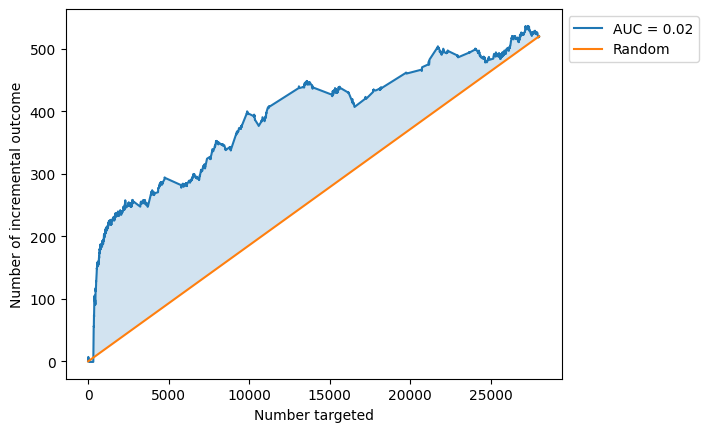

In [40]:
plot_qini_curve(y_val, y_pred_val, treat_val, perfect=False);

In [41]:
auc = metrics.qini_auc_score(y_val, y_pred_val, treat_val); auc

0.022098038814870054

In [42]:
2 * auc - 0.01

0.034196077629740106

# Feature importance

In [43]:
feature_importance_2 = pd.DataFrame({'value':model.estimator.get_booster().get_score(importance_type='gain')})\
    .sort_values('value', ascending=False)
feature_importance_2

,value
first_redeem_date,109.903664
express_points_spent_mean,25.737003
monthly_spend_mean,23.703560
express_points_spent_last_month,21.465057
express_points_spent_sum,19.906414
regular_points_spent_mean,18.403231
age,14.956476
regular_points_received_last_month,13.993851
last_month_spend,13.472129
redeem_delay,13.176951


In [44]:
feature_importance_2.shape

(21, 1)

In [48]:
feature_importance_1\
    .join(feature_importance_2, 
          how='outer',
         lsuffix='_round_1',
         rsuffix='_round_2')\
    .sort_values(by='value_round_2',
                ascending=False)

,value_round_1,value_round_2
first_redeem_date,123.613968,109.903664
express_points_spent_mean,23.695539,25.737003
monthly_spend_mean,29.564816,23.703560
express_points_spent_last_month,25.765757,21.465057
express_points_spent_sum,25.840641,19.906414
regular_points_spent_mean,21.989727,18.403231
age,17.294106,14.956476
regular_points_received_last_month,13.926761,13.993851
last_month_spend,12.367790,13.472129
redeem_delay,14.015310,13.176951


# Cross-validation to compare models on the full train set

In [49]:
X_full = df_full.loc[:, x_cols]
X_full

,regular_points_received_mean,regular_points_received_sum,express_points_received_mean,express_points_received_sum,regular_points_spent_mean,regular_points_spent_sum,express_points_spent_mean,express_points_spent_sum,purchase_mean,purchase_sum,...,last_month_spend,relative_spend_last_month,regular_points_received_last_month,express_points_received_last_month,regular_points_spent_last_month,express_points_spent_last_month,nunique,bought_most_pop,days_since_last_transact,purchased_own_products
client_id,,,,,,,,,,,,,,,,,,,,,
ad6561e2d8,2.432500,97.3,0.000000,0.0,-1.600000,-64.0,0.000000,0.0,270.035250,10801.41,...,2721.15,0.965714,1.966667,0.0,0.0,0.0,40,1.0,2,1.0
7c1ccbf93f,4.700000,9.4,0.000000,0.0,0.000000,0.0,0.000000,0.0,425.500000,851.00,...,851.00,0.900000,4.700000,0.0,0.0,0.0,2,1.0,13,1.0
b58fadcab6,2.772727,91.5,0.000000,0.0,-9.363636,-309.0,0.000000,0.0,429.447576,14171.77,...,2695.44,0.735432,3.050000,0.0,0.0,0.0,33,1.0,2,1.0
e99e6fabb9,1.046154,13.6,0.000000,0.0,0.000000,0.0,0.000000,0.0,220.923077,2872.00,...,927.00,1.140460,1.100000,0.0,0.0,0.0,13,0.0,3,1.0
27fb6f8520,2.740000,82.2,0.666667,20.0,-0.133333,-4.0,-1.666667,-50.0,329.540333,9886.21,...,4200.60,1.487132,4.137500,0.0,0.0,0.0,30,1.0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999d284453,8.625000,34.5,0.000000,0.0,0.000000,0.0,0.000000,0.0,744.500000,2978.00,...,471.00,0.611551,2.300000,0.0,0.0,0.0,4,0.0,3,1.0
f634deea4e,1.086792,57.6,0.000000,0.0,-1.754717,-93.0,0.000000,0.0,199.038302,10549.03,...,3535.78,1.296013,1.088889,0.0,0.0,0.0,53,1.0,0,1.0
16cb4f99b0,3.485714,24.4,0.000000,0.0,0.000000,0.0,0.000000,0.0,448.571429,3140.00,...,600.00,0.700637,1.450000,0.0,0.0,0.0,7,0.0,3,1.0


In [50]:
treat_full = df_full.loc[:, 'treatment_flg']
treat_full

client_id
ad6561e2d8    1
7c1ccbf93f    1
b58fadcab6    1
e99e6fabb9    0
27fb6f8520    1
             ..
999d284453    1
f634deea4e    0
16cb4f99b0    0
23c2b72b2e    1
1430184499    0
Name: treatment_flg, Length: 140027, dtype: int64

In [51]:
y_full = df_full.loc[:, 'purchased']
y_full

client_id
ad6561e2d8    1
7c1ccbf93f    1
b58fadcab6    1
e99e6fabb9    0
27fb6f8520    1
             ..
999d284453    1
f634deea4e    1
16cb4f99b0    1
23c2b72b2e    1
1430184499    1
Name: purchased, Length: 140027, dtype: int64

In [52]:
from sklearn.model_selection import KFold

In [80]:
n_splits = 10

In [81]:
kf = KFold(n_splits=n_splits)

In [82]:
cv_results = pd.DataFrame({'round_1': 0, 'round_2': 0}, index = range(n_splits))

In [83]:
%%time
%%chime
for i, (train_index, test_index) in enumerate(kf.split(X_full)):
    estimator_1 = XGBClassifier(random_state=8, 
                          use_label_encoder=False)
    estimator_2 = XGBClassifier(random_state=8, 
                          use_label_encoder=False)
    X_full_train = X_full.iloc[train_index]
    X_full_test = X_full.iloc[test_index]
    treat_full_train = treat_full.iloc[train_index]
    treat_full_test = treat_full.iloc[test_index]
    y_full_train = y_full.iloc[train_index]
    y_full_test = y_full.iloc[test_index]
    
    model_1 = ClassTransformation(estimator = estimator_1)
    model_2 = ClassTransformation(estimator = estimator_2)
    model_1.set_params(**best_params_1)
    model_2.set_params(**best_params_2)

    model_1.fit(
        X=X_full_train, 
        y=y_full_train, 
        treatment=treat_full_train)
    model_2.fit(
        X=X_full_train, 
        y=y_full_train, 
        treatment=treat_full_train)
    
    y_pred_1 = model_1.predict(X_full_test)
    y_pred_2 = model_2.predict(X_full_test)
    
    auc_1 = metrics.qini_auc_score(y_full_test, y_pred_1, treat_full_test)
    auc_2 = metrics.qini_auc_score(y_full_test, y_pred_2, treat_full_test)
    print(i, auc_1, auc_2)
    
    cv_results.loc[i, 'round_1'] = auc_1
    cv_results.loc[i, 'round_2'] = auc_2        
    

/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[20:36:34] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[20:36:35] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0 0.017051673485548757 0.016710860839784115
[20:36:36] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[20:36:38] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
1 0.017938835861610887 0.016244860858988477
[20:36:39] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[20:36:40] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
2 0.021622045731799745 0.0217940079021663
[20:36:41] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[20:36:43] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
3 0.025409783966354047 0.02585505525151722
[20:36:44] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[20:36:45] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
4 0.037728059109787236 0.03488929979583456
[20:36:46] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[20:36:48] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
5 0.011537352896326911 0.011314203951959293


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[20:36:49] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[20:36:50] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
6 0.028434640918222863 0.029615628162783552
[20:36:51] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[20:36:53] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
7 0.03081740175856249 0.030076693119748085
[20:36:54] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[20:36:55] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
8 0.027533672454807073 0.0269208918174091
[20:36:56] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[20:36:57] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
9 0.02540206216964806 0.027313548534968958
CPU times: user 1min 36s, sys: 532 ms, total: 1min 36s
Wall time: 24.8 s


In [84]:
cv_results

,round_1,round_2
0,0.017052,0.016711
1,0.017939,0.016245
2,0.021622,0.021794
3,0.025410,0.025855
4,0.037728,0.034889
5,0.011537,0.011314
6,0.028435,0.029616
7,0.030817,0.030077
8,0.027534,0.026921
9,0.025402,0.027314


In [85]:
cv_results.describe()

,round_1,round_2
count,10.000000,10.000000
mean,0.024348,0.024074
std,0.007571,0.007371
min,0.011537,0.011314
25%,0.018860,0.017982
50%,0.025406,0.026388
75%,0.028209,0.029040
max,0.037728,0.034889


## Variance is very high! Much bigger than the difference between the models

# Selecting the best set of features
I am using the first model as it trains faster and is (insiginficantly) better

In [86]:
total_features = feature_importance_1.shape[0]
total_features

18

In [94]:
feature_selection = pd.DataFrame({'auc': 0, 'std': 0}, index = range(1, total_features + 1))

In [92]:
n_splits = 10

In [93]:
kf = KFold(n_splits=n_splits)

In [111]:
%%time
%%chime
for j in range(1, total_features + 1):
    features = feature_importance_1.iloc[0:j].index.to_list()
    auc = []
    for i, (train_index, test_index) in enumerate(kf.split(X_full)):
        estimator = XGBClassifier(random_state=8, 
                              use_label_encoder=False)
        X_full_train = X_full[features].iloc[train_index]
        X_full_test = X_full[features].iloc[test_index]
        treat_full_train = treat_full.iloc[train_index]
        treat_full_test = treat_full.iloc[test_index]
        y_full_train = y_full.iloc[train_index]
        y_full_test = y_full.iloc[test_index]

        model = ClassTransformation(estimator = estimator)
        model.set_params(**best_params_1)

        model.fit(
            X=X_full_train, 
            y=y_full_train, 
            treatment=treat_full_train)

        y_pred = model.predict(X_full_test)

        auc.append(metrics.qini_auc_score(y_full_test, y_pred, treat_full_test))
    print(j, X_full_train.shape, X_full_test.shape, auc)
    feature_selection.loc[j, 'auc'] = pd.Series(auc).mean()
    feature_selection.loc[j, 'std'] = pd.Series(auc).std()
    

/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:36:23] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:36:23] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:36:23] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:36:23] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:36:24] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:36:24] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:36:24] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:36:25] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:36:25] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:36:25] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
1 (126025, 1) (14002, 1) [0.014375571890190217, 0.011532572723055719, 0.009741427360092796, 0.014109505090256316, 0.01574726894303348, 0.017002958069056637, 0.017785527193973544, 0.01507575789377571, 0.01776006418611086, 0.01813263249909867]
[21:36:26] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:36:26] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:36:27] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:36:28] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:36:28] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:36:29] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:36:29] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:36:30] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:36:30] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:36:31] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
2 (126025, 2) (14002, 2) [0.01015658103694004, 0.019344050921799204, 0.019006474046982746, 0.020934032990985445, 0.02571942736819295, 0.019024506460398938, 0.021443800130501272, 0.02251337278808801, 0.020260692407467567, 0.021862089312414155]
[21:36:32] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:36:32] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:36:33] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:36:33] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:36:34] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:36:34] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:36:35] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:36:36] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:36:36] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:36:37] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
3 (126025, 3) (14002, 3) [0.01295954325643161, 0.015738920471767205, 0.016703576338131004, 0.023143389213745737, 0.02691143541445985, 0.013733689651544938, 0.01961294147077808, 0.022050175424849237, 0.021782152537637964, 0.017761458266243535]
[21:36:37] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:36:38] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:36:39] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:36:39] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:36:40] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:36:40] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:36:41] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:36:41] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:36:42] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:36:43] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
4 (126025, 4) (14002, 4) [0.011318380029205098, 0.015511306121820428, 0.01532845048506713, 0.02078544494790431, 0.02695097473744811, 0.01681140293355428, 0.021527304242056438, 0.0230420500500089, 0.022098165109988428, 0.019625537592602178]
[21:36:43] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:36:44] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:36:44] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:36:45] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:36:46] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:36:46] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:36:47] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:36:47] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:36:48] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:36:48] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
5 (126025, 5) (14002, 5) [0.014366767738722058, 0.016668271417693396, 0.016032742404338256, 0.02294028311316361, 0.026988146485009138, 0.015660841923610707, 0.019783190677191385, 0.022524856009293798, 0.027079826735666307, 0.021805858281574445]
[21:36:49] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:36:50] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:36:50] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:36:51] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:36:51] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:36:52] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:36:53] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:36:53] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:36:54] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:36:54] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
6 (126025, 6) (14002, 6) [0.01541193744580103, 0.01700453251648975, 0.01717721557475654, 0.024497828457035666, 0.026346214092308154, 0.014599215070241629, 0.020795738537504528, 0.023672859814711, 0.02716397936969384, 0.021584110994985632]
[21:36:55] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:36:56] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:36:56] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:36:57] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:36:57] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:36:58] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:36:59] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:36:59] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:37:00] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:37:01] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
7 (126025, 7) (14002, 7) [0.015725443379014988, 0.015952512024998845, 0.015490403961519532, 0.03194619321258798, 0.030853114869515516, 0.011655875574764232, 0.024721944345304815, 0.02518121032845485, 0.026901702621720824, 0.022266597634946896]
[21:37:01] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:37:02] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:37:02] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:37:03] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:37:04] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:37:04] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:37:05] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:37:06] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:37:06] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:37:07] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
8 (126025, 8) (14002, 8) [0.017967750818347877, 0.016352758745904836, 0.016000053026461698, 0.031081426146690624, 0.03266521952437862, 0.00951073364505282, 0.022476357445076187, 0.027989515448726403, 0.027167837495312746, 0.02348144156916308]
[21:37:07] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:37:08] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:37:09] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:37:09] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:37:10] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:37:11] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:37:11] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:37:12] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:37:12] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:37:13] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
9 (126025, 9) (14002, 9) [0.018040374950774988, 0.015469144178305446, 0.013241039061986126, 0.03172692012605334, 0.03226259062826487, 0.009885823587417773, 0.02513291731426118, 0.026871949627288765, 0.026843564085864784, 0.02153487634337486]
[21:37:14] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:37:14] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:37:15] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:37:16] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:37:16] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:37:17] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:37:18] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:37:18] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:37:19] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:37:20] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
10 (126025, 10) (14002, 10) [0.017959540234535883, 0.01643836267958751, 0.014286924893701572, 0.03413166403210342, 0.032797531064845994, 0.00954528647226945, 0.026795061364686738, 0.02673658887592297, 0.02572898215678767, 0.02239580556946289]
[21:37:20] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:37:21] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:37:22] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:37:22] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:37:23] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:37:24] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:37:24] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:37:25] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:37:26] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:37:27] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
11 (126025, 11) (14002, 11) [0.018578169185678, 0.01715894417274132, 0.016804366981083337, 0.031993122216237714, 0.0340811764069904, 0.010762562874750019, 0.026577049140731362, 0.031222063817184505, 0.026215169656729015, 0.023924113204381637]
[21:37:27] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:37:28] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:37:29] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:37:29] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:37:30] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:37:31] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:37:31] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:37:32] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:37:33] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:37:33] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
12 (126025, 12) (14002, 12) [0.01775571990284371, 0.018524373516315175, 0.015681124303057164, 0.02988828499260595, 0.03284455895897306, 0.011485481796790204, 0.026146101970558694, 0.030425291824573382, 0.027749978581890072, 0.023779174182306868]
[21:37:34] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:37:35] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:37:36] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:37:37] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:37:37] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:37:38] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:37:39] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:37:40] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:37:41] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:37:42] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
13 (126025, 13) (14002, 13) [0.018715240410653554, 0.017978193979537187, 0.01899073673775994, 0.031992375306818005, 0.03710765474528027, 0.011199970967465991, 0.028023078421805393, 0.0336764942654096, 0.026134233567844292, 0.02382563909031665]
[21:37:43] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:37:44] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:37:45] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:37:46] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:37:47] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:37:48] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:37:49] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:37:50] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:37:51] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:37:52] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
14 (126025, 14) (14002, 14) [0.018547765466909606, 0.018758236481045413, 0.017496617144601802, 0.028735742103883636, 0.036756162476415714, 0.012728027360402561, 0.028315260246372466, 0.029279932525754254, 0.028793568870841568, 0.026814565756035084]
[21:37:53] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:37:54] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:37:55] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:37:56] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:37:57] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:37:58] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:37:59] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:38:00] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:38:01] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:38:02] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
15 (126025, 15) (14002, 15) [0.017479361129814165, 0.0180894011372811, 0.020467626501067017, 0.027971192927398643, 0.03623279013432315, 0.010589168562087541, 0.02870095480538277, 0.02989929461071339, 0.027329649770987265, 0.026664944269811374]
[21:38:03] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:38:04] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:38:05] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:38:06] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:38:07] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:38:08] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:38:09] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:38:10] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:38:11] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:38:12] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
16 (126025, 16) (14002, 16) [0.016351920759268838, 0.01723783801070995, 0.020467626501067017, 0.028112948553721054, 0.035756321887661036, 0.011826907652943672, 0.029145053211364725, 0.0295559878967761, 0.027329649770987265, 0.025770167578564807]
[21:38:13] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:38:14] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:38:15] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:38:16] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:38:17] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:38:18] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:38:19] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:38:20] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:38:21] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:38:22] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
17 (126025, 17) (14002, 17) [0.017965727508645384, 0.02098444436855718, 0.019894356525842212, 0.028112948553721054, 0.03740243916236765, 0.010730458706172381, 0.027449489640567544, 0.02861273685031238, 0.02699960427150302, 0.02752857297125001]
[21:38:23] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:38:25] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:38:26] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:38:27] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:38:29] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:38:30] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:38:31] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:38:33] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:38:34] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:38:35] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
18 (126025, 18) (14002, 18) [0.017644495259693894, 0.017459403335116485, 0.021688128161167795, 0.025466669817618682, 0.03826619684843317, 0.012495484170198719, 0.02777226546994103, 0.030207739670196642, 0.026102910612990738, 0.025481109311557892]
CPU times: user 8min 29s, sys: 9.62 s, total: 8min 38s
Wall time: 2min 13s


In [112]:
feature_selection

,auc,std
1,0.015126,0.002798
2,0.020027,0.004011
3,0.019040,0.004458
4,0.019300,0.004566
5,0.020385,0.004633
6,0.020825,0.004580
7,0.022069,0.007025
8,0.022469,0.007447
9,0.022101,0.007738
10,0.022682,0.008031


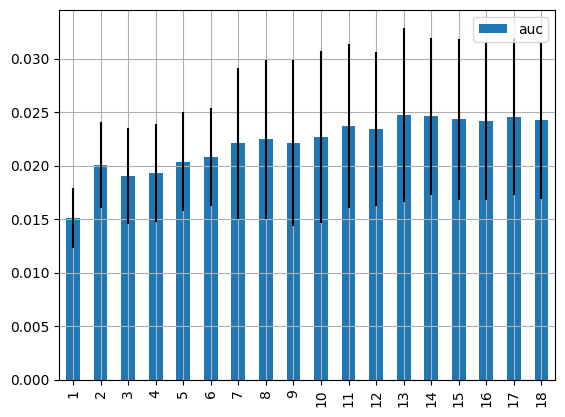

In [116]:
feature_selection.plot(y='auc',
                      kind='bar',
                      use_index=True,
                      grid=True,
                      yerr='std');

### Checking split

In [117]:
split_quality =\
    pd.DataFrame({'train_treatm': 0, 
                  'test_treatm': 0,
                 'train_purch': 0,
                 'test_purch': 0}, 
                 index = range(10))
split_quality

,train_treatm,test_treatm,train_purch,test_purch
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
5,0,0,0,0
6,0,0,0,0
7,0,0,0,0
8,0,0,0,0
9,0,0,0,0


In [122]:
for i, (train_index, test_index) in enumerate(kf.split(X_full)):
    split_quality.loc[i, 'train_treatm'] =\
        treat_full.iloc[train_index].value_counts(normalize=True)[1]
    split_quality.loc[i, 'test_treatm'] =\
        treat_full.iloc[test_index].value_counts(normalize=True)[1]
    split_quality.loc[i, 'train_purch'] =\
        y_full.iloc[train_index].value_counts(normalize=True)[1]
    split_quality.loc[i, 'test_purch'] =\
    y_full.iloc[test_index].value_counts(normalize=True)[1]
    treat_full_test = treat_full.iloc[test_index]
    


In [123]:
split_quality

,train_treatm,test_treatm,train_purch,test_purch
0,0.500595,0.497893,0.619430,0.621438
1,0.499873,0.504392,0.620041,0.615939
2,0.500286,0.500678,0.619406,0.621653
3,0.499937,0.503821,0.619382,0.621867
4,0.499722,0.505749,0.620104,0.615368
5,0.500389,0.499750,0.620477,0.612012
6,0.500540,0.498393,0.618533,0.629508
7,0.500258,0.500928,0.619766,0.618412
8,0.500218,0.501286,0.619322,0.622411
9,0.501432,0.490359,0.619845,0.617697


### Not sure why variance is so high

# Prediction on the test set

Training model on the full dataset

In [125]:
best_features = feature_importance_1.iloc[0:13].index.to_list()

In [127]:
X_final = df_full.loc[:, best_features]
X_final

,first_redeem_date,monthly_spend_mean,express_points_spent_sum,express_points_spent_last_month,express_points_spent_mean,regular_points_spent_mean,age,days_since_last_transact,redeem_delay,regular_points_received_last_month,nunique,first_issue_date,last_month_spend
client_id,,,,,,,,,,,,,
ad6561e2d8,17674,2817.759130,0.0,0.0,0.000000,-1.600000,50.0,2,171,1.966667,40,17503,2721.15
7c1ccbf93f,17584,945.555556,0.0,0.0,0.000000,0.000000,24.0,13,104,4.700000,2,17480,851.00
b58fadcab6,17789,3665.112931,0.0,0.0,0.000000,-9.363636,36.0,2,317,3.050000,33,17472,2695.44
e99e6fabb9,17681,812.830189,0.0,0.0,0.000000,0.000000,79.0,3,14,1.100000,13,17667,927.00
27fb6f8520,17515,2824.631429,-50.0,0.0,-1.666667,-0.133333,34.0,0,151,4.137500,30,17364,4200.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
999d284453,17992,770.172414,0.0,0.0,0.000000,0.000000,72.0,3,157,2.300000,4,17835,471.00
f634deea4e,17602,2728.197414,0.0,0.0,0.000000,-1.754717,35.0,0,36,1.088889,53,17566,3535.78
16cb4f99b0,18047,856.363636,0.0,0.0,0.000000,0.000000,50.0,3,462,1.450000,7,17585,600.00


In [128]:
treat_full = df_full.loc[:, 'treatment_flg']
treat_full

client_id
ad6561e2d8    1
7c1ccbf93f    1
b58fadcab6    1
e99e6fabb9    0
27fb6f8520    1
             ..
999d284453    1
f634deea4e    0
16cb4f99b0    0
23c2b72b2e    1
1430184499    0
Name: treatment_flg, Length: 140027, dtype: int64

In [129]:
y_full = df_full.loc[:, 'purchased']
y_full

client_id
ad6561e2d8    1
7c1ccbf93f    1
b58fadcab6    1
e99e6fabb9    0
27fb6f8520    1
             ..
999d284453    1
f634deea4e    1
16cb4f99b0    1
23c2b72b2e    1
1430184499    1
Name: purchased, Length: 140027, dtype: int64

In [130]:
model_full = ClassTransformation(estimator = estimator)

In [131]:
model_full.set_params(**best_params_1)

ClassTransformation(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1,
                                            enable_categorical=False, gamma=0,
                                            gpu_id=-1, importance_type=None,
                                            interaction_constraints='',
                                            learning_rate=0.05,
                                            max_delta_step=0, max_depth=3,
                                            min_child_weight=1, missing=nan,
                                            monotone_constraints='()',
                                            n_estimators=25, n_jobs=4,
                                            num_parallel_tree=1,
                                            predictor='auto', random_state=8,
                                            reg_alpha=0.05, reg_lambda=0,
                                            scale_pos_weight=1, subsample=1,
                                            tree_method='exact',
                                            use_label_encoder=False,
                                            validate_parameters=1,
                                            verbosity=None))

In [132]:
%%time
model_full = model_full.fit(X_final, y_full, treat_full)

/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:58:28] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
CPU times: user 3.22 s, sys: 51.8 ms, total: 3.27 s
Wall time: 866 ms


Prediction

In [133]:
X_test_final = pd.read_csv('clients_test_modified_2.csv', 
                           index_col='client_id')\
    .loc[:, best_features]
X_test_final

,first_redeem_date,monthly_spend_mean,express_points_spent_sum,express_points_spent_last_month,express_points_spent_mean,regular_points_spent_mean,age,days_since_last_transact,redeem_delay,regular_points_received_last_month,nunique,first_issue_date,last_month_spend
client_id,,,,,,,,,,,,,
00010925a5,17788,1561.858407,0.0,0.0,0.000000,-0.944444,83.0,10,52,1.737500,18,17736,2858.00
00035a21d9,17957,1452.924324,-30.0,-30.0,-10.000000,-2.666667,69.0,16,21,14.800000,3,17936,786.00
00038f9200,17908,2490.594059,0.0,0.0,0.000000,-0.604167,79.0,0,36,2.335294,48,17872,3033.00
0004315e57,17929,2015.044248,-60.0,-5.0,-4.285714,-2.785714,38.0,10,69,4.750000,14,17860,3056.00
0006fca4bf,18220,2470.384615,0.0,0.0,0.000000,0.000000,57.0,8,273,11.800000,3,17947,2141.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
fff9aa288c,17962,1398.710377,0.0,0.0,0.000000,-4.600000,48.0,11,108,0.700000,10,17854,191.81
fff9f772f6,17977,2039.758696,0.0,0.0,0.000000,0.000000,54.0,3,605,37.150000,4,17372,4084.71
fffe0ed719,17512,2694.175862,0.0,0.0,0.000000,0.000000,69.0,0,88,3.147368,30,17424,8551.48


In [134]:
y_pred_test = model_full.predict(X_test_final); y_pred_test

array([0.02635896, 0.07141268, 0.02635896, ..., 0.02635896, 0.02635896,
       0.01559162], dtype=float32)

In [135]:
X_test_final['pred'] = y_pred_test
X_test_final

,first_redeem_date,monthly_spend_mean,express_points_spent_sum,express_points_spent_last_month,express_points_spent_mean,regular_points_spent_mean,age,days_since_last_transact,redeem_delay,regular_points_received_last_month,nunique,first_issue_date,last_month_spend,pred
client_id,,,,,,,,,,,,,,
00010925a5,17788,1561.858407,0.0,0.0,0.000000,-0.944444,83.0,10,52,1.737500,18,17736,2858.00,0.026359
00035a21d9,17957,1452.924324,-30.0,-30.0,-10.000000,-2.666667,69.0,16,21,14.800000,3,17936,786.00,0.071413
00038f9200,17908,2490.594059,0.0,0.0,0.000000,-0.604167,79.0,0,36,2.335294,48,17872,3033.00,0.026359
0004315e57,17929,2015.044248,-60.0,-5.0,-4.285714,-2.785714,38.0,10,69,4.750000,14,17860,3056.00,0.046668
0006fca4bf,18220,2470.384615,0.0,0.0,0.000000,0.000000,57.0,8,273,11.800000,3,17947,2141.00,0.014663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fff9aa288c,17962,1398.710377,0.0,0.0,0.000000,-4.600000,48.0,11,108,0.700000,10,17854,191.81,0.013738
fff9f772f6,17977,2039.758696,0.0,0.0,0.000000,0.000000,54.0,3,605,37.150000,4,17372,4084.71,0.404875
fffe0ed719,17512,2694.175862,0.0,0.0,0.000000,0.000000,69.0,0,88,3.147368,30,17424,8551.48,0.026359


In [136]:
X_test_final.pred.to_csv('submit_best_features.csv')

# Checking to see if I use the right metric

In [19]:
estimator = XGBClassifier(random_state=8, 
                          use_label_encoder=False)

In [20]:
model = ClassTransformation(estimator = estimator)

In [21]:
best_params_1 = {'estimator__learning_rate': 0.05,
 'estimator__max_depth': 3,
 'estimator__n_estimators': 25,
 'estimator__reg_alpha': 0.05,
 'estimator__reg_lambda': 0}

In [23]:
model.set_params(**best_params_1)

model.fit(
    X=X_train, 
    y=y_train, 
    treatment=treat_train,
)

/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[00:52:28] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


ClassTransformation(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1,
                                            enable_categorical=False, gamma=0,
                                            gpu_id=-1, importance_type=None,
                                            interaction_constraints='',
                                            learning_rate=0.05,
                                            max_delta_step=0, max_depth=3,
                                            min_child_weight=1, missing=nan,
                                            monotone_constraints='()',
                                            n_estimators=25, n_jobs=4,
                                            num_parallel_tree=1,
                                            predictor='auto', random_state=8,
                                            reg_alpha=0.05, reg_lambda=0,
                                            scale_pos_weight=1, subsample=1,
                                            tree_method='exact',
                                            use_label_encoder=False,
                                            validate_parameters=1,
                                            verbosity=None))

In [24]:
y_pred_val = model.predict(X_val)
y_pred_val

array([0.02218449, 0.02026272, 0.00109386, ..., 0.01175225, 0.02962375,
       0.01227558], dtype=float32)

In [25]:
metrics.qini_auc_score(y_val, y_pred_val, treat_val)

0.02224139583047751

In [26]:
metrics.uplift_auc_score(y_val, y_pred_val, treat_val)

0.031717813507974986

Neither matches the public score.